<h1>Predictive Analytics for Daily Guest Counts</h1>

# Phase 1 Proposal

## Domain Understanding

For the domain understanding part of this project, I used my experience working at Tortillas since the summer of 2022. I've learned a lot about how restaurants work during this time. Also, because Tortillas is in a busy restaurant area, I know a lot about what happens in the neighborhood. I can easily talk to other restaurant workers to learn more. My boss at Tortillas also gave me some good ideas about what might affect how many guests we have, like PSV matches or Effenaar concerts. This helped me figure out what to look for when predicting guest numbers.

### Research

After looking at some research to see if other projects like ours have worked, we'll tackle the main question: How do we guess how many guests a restaurant will have? Then, we'll break it down into smaller questions like what things affect how many people come to a restaurant, if there are already ways to guess this, and how we can make our guesses better over time.

##### Main question
How do you accurately predict the number of guests a restaurant will receive?

##### Sub questions
A.	What are the key factors influencing restaurant guest numbers?

B.	Are there existing models or frameworks in the industry for predicting restaurant guest numbers?

C.	How can the accuracy of the prediction models be evaluated and improved over time?

#### Results

##### What are some key factors?

Understanding why people choose to dine at restaurants is important for improving restaurant operations. This analysis examines two primary categories of factors: internal factors, which pertain to aspects within the restaurant, and external factors, which are influenced by elements outside the restaurant's control. By exploring these factors, restaurants can gain insights into customer behavior and improve their overall performance.

<table>
  <tr>
    <th>Internal Factors</th>
    <th>External Factors</th>
  </tr>
  <tr>
    <td>Price</td>
    <td>Location</td>
  </tr>
  <tr>
    <td>Staff Quality</td>
    <td>Events</td>
  </tr>
  <tr>
    <td>Reviews</td>
    <td>Weather/Season</td>
  </tr>
  <tr>
    <td>Decoration/Ambiance</td>
    <td>Holidays</td>
  </tr>
</table>


Improving internal factors within a restaurant is relatively straightforward, as there is a wealth of resources available online offering tips and guidance on enhancing various aspects of the dining experience. For instance, like this article provide valuable insights into optimizing key elements such as ambiance, service quality, and customer interactions. By leveraging these resources and implementing recommended strategies, restaurants can effectively elevate their brand experience and attract more guests.

Randy also told me that other things outside our control are when the Dutch national football team plays (not just PSV) and when there's an Amber Alert (Code Red/Yellow), which leads to lots of canceled reservations. Even though our restaurant is close to the train station and a cinema, Randy said these things aren't as important to mention.

##### Are there any existing models?

There are tools like 5Out, that are utilized in the restaurant industry to make informed predictions about future trends. Additionally, platforms such as Kobas and Lineup AI provide insights into leveraging AI for enhancing guest experiences and creating restaurant sales forecasts respectively. The Kobas article explores how AI can be used to elevate guest experiences in restaurants, while Lineup AI offers guidance on collecting and analyzing historical sales data to create accurate sales forecasts.

A student from Oregon State University conducted a machine learning project aimed at predicting dinner guest counts for a local restaurant in Corvallis, Oregon. The project sought to address the challenge faced by restaurant management in accurately estimating customer numbers for staffing and inventory management purposes. Leveraging a decomposable time series model, the student aimed to provide a more reliable method for forecasting guest counts, ultimately leading to more efficient staffing decisions and potential cost savings for the restaurant. Ongoing efforts are focused on refining the algorithm by incorporating additional data sources, such as weather conditions and local events, to further enhance prediction accuracy (Lusardi, 2020).

A study demonstrates the utilization of various features for training a dataset aimed at predicting customer arrivals in restaurants. These features include weather conditions such as temperature, humidity, precipitation, and wind speed, as well as temporal factors like day of the week, month, and season. Additionally, the study incorporates information on holidays and special events, which can significantly influence restaurant traffic. By analyzing these diverse features, the model aims to accurately forecast customer arrivals, enabling restaurants to optimize staffing levels and operational efficiency (Tanizaki, Kozuma, & Shimmura, 2021).

In conclusion, as evidenced by the examples provided, there are notable advancements in leveraging predictive analytics tools and machine learning algorithms within the restaurant industry. These developments offer promising opportunities to enhance operational efficiency and guest experiences. Given the demonstrated potential of these technologies, further exploration and implementation in restaurant management practices are warranted.

##### How can the accuracy of the prediction models be evaluated and improved over time?
According to the AI methodology, the process involves iterating and improving the model over time. This iterative approach allows for continuous refinement and enhancement based on feedback from model evaluations. This methodology ensures that every project follows a structured process, facilitating clear understanding and effective execution of tasks.

Expanding on feature engineering involves enriching the dataset by adding more features to make it wider. This process goes beyond simply collecting more data points; it entails identifying and incorporating relevant variables or attributes that can provide valuable insights into the underlying patterns of the data.

One approach is to explore new variables that may influence the outcome of interest. This could involve gathering additional data sources that are related to the problem domain. For example, in the context of predicting restaurant guest numbers, new features might include demographic information about the local population, nearby points of interest, or social media activity related to dining trends.

By expanding the dataset with new features and creatively engineering existing ones, we can enhance the model's ability to capture complex relationships within the data, ultimately leading to more accurate predictions.

Furthermore, seeking guidance from machine learning teachers and actively engaging in practical exercises can provide valuable insights into refining prediction models. By adjusting settings like hyperparameters, which control how algorithms learn, students can iteratively enhance model performance and gain deeper understanding of machine learning concepts.

### Data

To make accurate predictions about the customer numbers, it's important to gather lots of different kinds of information. The more we know (data we have), it's easier to create better models. So if I want to predict the amount of customers, I need more then just the customer numbers. We're looking into stuff like what events are going on, who walks into the resaurant (at what time), etc.

#### Restaurant
At Tortillas, we have a computer that keeps track of how many customers come in each day and when they arrive. We can also see if there are any big groups coming, as we have a special area upstairs for them. I wanted to use this data to guess what food and drinks people would order, but I can't because of ethical reasons for the restaurant.

#### Weather
Weather could be an important factor, because when it's warm and sunny outside, lots of people come into town and our terrace gets stuffed. But when it's rainy or windy, fewer people feel like going out to eat.

#### PSV
Randy told me that PSV matches really affect how many customers we get. If the matches are early or late, it changes when people come in. Especially when PSV is doing well in the championship, we get a lot more customers filling up our seats. Interestingly, it's not just PSV that matters; when the Dutch national team plays, we also notice more guests than usual.

#### Effenaar
Events at the Effenaar are like PSV matches for us. When there's a concert, lots of people come before it and/or during breaks. You can tell because they dress up for it and talk about the event.

#### Events
Besides sports and concerts, big events in the city also bring in a lot of customers. Whether it's King's Day celebrations, the Glow light festival, or Dutch Design Week, these events make our restaurant really busy.

#### Cinema/Station
I talked to Randy about how the nearby Pathé cinema and train station might bring in more customers. But it turns out they don't make as big of a difference as other things, so we don't need to change how we do things because of them. I tried to gather data on disruptions for Eindhoven Station, but unfortunately, I didn't get the information I needed. Instead of receiving a list of dates when disruptions occurred, the data was incomplete.

### End product

I've thought about an end product and my idea was making a sort of dashboard application where you can see the history of the amount of customers, and the forecast. And a sort of calender where you can see how the forecast is being calculated. Also there needs to be a function where you can enter the amount of guests and see some features aswell. The weather feature could be automatically integrated with the [KNMI API](https://weerlive.nl/delen.php), the holidays could be automatically integrated with the [rijksoverheid](https://www.rijksoverheid.nl/opendata/schoolvakanties), the other features should be clicked manually. Ive made figma for it [here](https://www.figma.com/file/0rDSaqNKDDB3AthyeX6YbG/Tortillas). 

### Negative effects

To check the negative effects for the prediction tool, Ive used a technology impact cycle tool. You can find it [here](https://www.tict.io/tool/b32c7be7-c7ee-469e-a366-c1f682111a47). In a brief conclusion, there are minimal negative effects for this tool.

## Data Sourcing

For data sourcing, I initially consulted with my boss at Tortillas to explore potential sources of data for my project. Unfortunately, the available data was limited. After two weeks of waiting, I received only the order deliveries data, which did not include sales data, essential for my intended analysis. Additionally, the order deliveries were aggregated on a weekly basis, making it challenging to make daily predictions accurately. The assumption that all purchases for the week corresponded to sales for that same week was not ideal, as sales could fluctuate daily. Furthermore, due to ethical and privacy concerns, accessing additional data, such as financial records, was not possible.

Despite these limitations, I realized that I could readily access data on the number of guests visiting Tortillas each day. While this dataset alone may seem insufficient, I recognized the potential to enrich it by incorporating external factors known to influence guest numbers. Factors such as weather conditions, local events, holidays, and special occasions could significantly impact restaurant traffic. With access to this data, I could enhance the complexity of my dataset and improve the accuracy of my predictive model.

### Objectives and Target Audience

The primary objective of my project is to predict the number of guests visiting Tortillas restaurant each day. By doing so, I aim to assist restaurant management in making informed decisions regarding staffing levels, inventory management, and overall business strategy. The target audience for this project includes restaurant owners, managers, and staff who rely on accurate forecasts to optimize daily operations.

### Data Characteristics

To achieve our objectives, I require structured data detailing the number of guests visiting Tortillas each day, preferably over a significant historical period to establish trends and patterns. Additionally, I will need unstructured data on external factors such as weather conditions, local events, and holidays. These datasets will provide the necessary context to enhance the predictive capabilities of our model.

### Data Sources

The data on the number of guests visiting Tortillas each day can be sourced directly from the restaurant's records, provided by my boss. For external factors such as weather conditions and local events, I will need to search the internet or reach out to relevant organizations and authorities for accurate and up-to-date information. This may involve accessing public databases, APIs, or creating an own dataset collecting information from the calendar.

### Version Control

To maintain version control for my data, I plan to start with a dataset spanning three months of historical guest counts and external factors. As I clean, preprocess, and augment the data, I will maintain a clear version history to ensure reproducibility and scalability. If the initial model proves successful, I will consider expanding the dataset and implementing more advanced version control practices to manage ongoing updates and improvements.

## Analytic Approach

In this phase, a specific goal and approach for the project are defined, focusing on predicting the number of guests visiting the restaurant. The objective is to determine the target variable, understand the nature of the problem, and identify key indicators within the dataset to facilitate accurate predictions.

### 🎯 Target Variable:

The target variable for the predictive model is the number of guests visiting the restaurant on a given day. This variable represents the "thing" aimed to be predicted based on other features in the dataset. By forecasting the daily guest count, assistance can be provided to restaurant management in optimizing staffing levels, inventory management, and overall business strategy.

### 🎨 Nature of the Problem:

The nature of the target variable determines the type of algorithm suitable for the predictive analytics model. In this case, it involves a regression problem as the aim is to predict a continuous numerical value – the daily guest count. Regression algorithms are well-suited for such problems as they can effectively estimate the relationship between input features and the target variable to make predictions.

### 📍 Good Indicators:

To identify good indicators for predicting the daily guest count, exploratory data analysis (EDA) is conducted to uncover correlations between the target variable and other features in the dataset. By calculating correlation coefficients, the strength and direction of relationships between variables can be determined. Features exhibiting strong correlations with the number of guests serve as valuable indicators for the predictive model.

# Phase 2 Provisioning

## Data Requirements

For the Tortillas project, I use several datasets to add more features. These datasets include:

Guest Counts:
A dataset containing daily guest counts for Tortillas serves as the primary input. This data reveals the restaurant's foot traffic over time, essential for prediction.

Weather data:
Weather data are important for the tortillas industry, especially temperature and precipitation. These factors greatly influence consumer behavior and restaurants. Although temperature and precipitation are believed to have the most important effects, we will consider other climate variables to examine relationships and improve forecasts.

Effenaar Agenda:
An Effenaar agenda dataset lists upcoming events and concerts, including artist, venue, and date/time details. This dataset allows consideration of local events' impact on restaurant attendance.

PSV Matches:
Information about PSV matches, indicating home or away games and match types (e.g., Eredivisie, Champions League), is included. Sporting events draw crowds to the area, affecting restaurant traffic.

Other:
Consideration of additional factors affecting restaurant attendance, such as holidays, local festivals, promotions, or community events, is imperative. While these data may not be readily accessible, it is essential to explore avenues for integrating relevant information into the analysis.

### Data dictionary

| Data Element Name | Data Type  | Units        | Range      | Description                        | Source             | Quality Standards                             | Notes                            |
|-------------------|------------|--------------|------------|------------------------------------|--------------------|-----------------------------------------------|----------------------------------|
| Guest Counts      | Numerical  | Guests       | 0 to 250     | Daily count of restaurant guests   | Internal database  |                |                                  |
| Temperature       | Numerical  | Celsius (°C) | -10 to 35  | Temperature in degrees Celsius     | KNMI       |                 |                                  |
| Rain     | Numerical  | Millimeters  | 0 to ∞     | Amount of precipitation            | KNMI        |                    |
| Wind Speed        | Numerical  | Meters/second| 0 to 20     | Speed of wind                      |KNMI        |                  |                                  |
| Effenaar Agenda   | Categorical| N/A          | N/A        | Upcoming events at Effenaar        | Effenaar website   |                      |                                  |
| PSV Matches       | Categorical| N/A          | N/A        | PSV match information              | PSV website        |                         |                                  |
| Other Factors     | Categorical| N/A          | N/A        | Additional factors influencing attendance | Various sources |                     | Consider holidays, promotions, NS |


## Data Collection

In [385]:
#Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
pd.options.mode.chained_assignment = None

### Restaurant

The data was gathered directly from the restaurant using a system called [Formitable](https://formitable.com/en/). This platform allows me to effortlessly track the number of guests we've served each day. I then manually input this information into my Tortillas.xlsx file for record-keeping.

In [386]:
# Read the data
dfTortillas = pd.read_excel("Tortillas.xlsx")
dfTortillas.head()

,Date,Day,Season,Total guests
0,2024-03-17,Sunday,Winter,50.0
1,2024-03-16,Saturday,Winter,71.0
2,2024-03-15,Friday,Winter,53.0
3,2024-03-14,Thursday,Winter,55.0
4,2024-03-13,Wednesday,Winter,11.0


Date: Represents the specific date, formatted as YYYY-MM-DD.

Day: Indicates the day of the week corresponding to the date.

Season: Type of season for the day.

Total guests: Refers to the total number of guests served on the corresponding date.

In [387]:
dfTortillas.describe()

,Date,Total guests
count,807,755.000000
mean,2023-02-08 00:00:00,40.337748
min,2022-01-01 00:00:00,0.000000
25%,2022-07-21 12:00:00,23.000000
50%,2023-02-08 00:00:00,35.000000
75%,2023-08-28 12:00:00,55.000000
max,2024-03-17 00:00:00,166.000000
std,NaN,25.179854


In [388]:
dfTortillas.dtypes

Date            datetime64[ns]
Day                     object
Season                  object
Total guests           float64
dtype: object

In [389]:
dfTortillas.shape

(807, 4)

### Weather

The weather data was collected from the Royal Netherlands Meteorological Institute (KNMI). KNMI provides historical weather data, including temperature, precipitation, and wind speed, which are usefull factors for this analysis. The data was downloaded in a structured format, which allowed for easy integration into the existing dataset. This comprehensive weather data provides valuable insights into how weather conditions may influence the number of guests visiting the restaurant.

In [390]:
# Read the data
dfWeather = pd.read_csv("Weather.csv", sep=",")
dfWeather.head()

,STN,YYYYMMDD,DDVEC,FHVEC,FG,FHX,FHXH,FHN,FHNH,FXX,...,VVNH,VVX,VVXH,NG,UG,UX,UXH,UN,UNH,EV24
0,370,20220101,192,41,42,50,1,30,9,90,...,2,75,13,8,84,91,2,78,23,4
1,370,20220102,222,60,66,100,21,40,2,170,...,8,75,9,8,81,93,19,73,14,3
2,370,20220103,224,67,68,80,1,40,18,140,...,5,75,14,8,84,90,7,77,1,2
3,370,20220104,236,28,37,60,12,20,16,100,...,12,70,14,8,91,95,7,84,21,1
4,370,20220105,254,52,53,80,11,30,20,150,...,16,73,4,6,85,95,21,74,11,2


The weather dataset contains a wealth of information, including various meteorological factors. However, for the purpose of this analysis, we will focus on the features that are most likely to influence restaurant attendance. Specifically, we will consider the temperature, amount of rainfall, and wind speed. These factors are believed to have a significant impact on consumer behavior and, consequently, the number of guests visiting the restaurant.

In [391]:
dfWeather_selected = dfWeather[['YYYYMMDD', '   TX', '   RH', '   DR', '  RHX', ' RHXH', '   FG', ' FHXH']]

# Renaming columns for clarity
dfWeather_selected.columns = ['Date', 'Temperature', 'Rain', 'Duration rain', 'Max rain', 'Timezone max rain', 'Wind', 'Timezone max wind']

# Assuming dfWeather_selected is your DataFrame with the 'Date' column
dfWeather_selected['Date'] = pd.to_datetime(dfWeather_selected['Date'], format='%Y%m%d')

# Converting temperature from 0.1 degrees Celsius to degrees Celsius
dfWeather_selected.loc[:, 'Temperature'] = dfWeather_selected['Temperature']
dfWeather_selected["Temperature"] *= 0.1

# Converting rain from 0.1 mm to mm
dfWeather_selected.loc[:, 'Rain'] = dfWeather_selected['Rain']
dfWeather_selected["Rain"] *= 0.1

# Converting duration rain from 0.1 hours to hours
dfWeather_selected.loc[:, 'Duration rain'] = dfWeather_selected['Duration rain']
dfWeather_selected["Duration rain"] *= 0.1

# Converting max rain from 0.1 mm to mm
dfWeather_selected.loc[:, 'Max rain'] = dfWeather_selected['Max rain']
dfWeather_selected["Max rain"] *= 0.1

dfWeather_selected.loc[:, 'Timezone max rain'] = dfWeather_selected['Timezone max rain']

# Converting wind from 0.1 m/s to m/s
dfWeather_selected.loc[:, 'Wind'] = dfWeather_selected['Wind']
dfWeather_selected["Wind"] *= 0.1

dfWeather_selected.head()

,Date,Temperature,Rain,Duration rain,Max rain,Timezone max rain,Wind,Timezone max wind
0,2022-01-01,14.4,0.0,0.0,0.0,1,4.2,1
1,2022-01-02,13.7,2.7,4.8,0.6,19,6.6,21
2,2022-01-03,11.1,0.5,0.4,0.4,7,6.8,1
3,2022-01-04,8.5,3.9,3.9,1.7,15,3.7,12
4,2022-01-05,6.2,3.3,2.8,2.0,19,5.3,11


Date = Date (YYYY=year MM=month DD=day)

Temperature = Maximum temperature (degrees Celsius). The restaurant operates on weekdays starting at 5 p.m. and on weekends around 2 p.m. Therefore, it is sensible to select the maximum temperature recorded for each respective day.

Rain = Daily precipitation amount (in mm) (-0.1 for <0.05 mm)

Duration rain = Precipitation duration (in 1 hour)

Max rain = Maximum hourly precipitation amount (in mm) (-0.1 for <0.05 mm)

Timezone max rain = Hourly division in which Max rain was measured

Wind = Daily mean windspeed (in m/s)

In [392]:
dfWeather_selected.describe()

,Date,Temperature,Rain,Duration rain,Max rain,Timezone max rain,Wind,Timezone max wind
count,805,805.000000,805.000000,805.000000,805.000000,805.000000,805.000000,805.000000
mean,2023-02-07 00:00:00,15.979752,2.548447,1.965093,0.948199,6.744099,3.805839,10.961491
min,2022-01-01 00:00:00,-1.300000,-0.100000,0.000000,-0.100000,1.000000,0.800000,1.000000
25%,2022-07-21 00:00:00,10.400000,0.000000,0.000000,0.000000,1.000000,2.600000,8.000000
50%,2023-02-07 00:00:00,15.400000,0.000000,0.000000,0.000000,1.000000,3.500000,11.000000
75%,2023-08-27 00:00:00,22.100000,2.700000,2.600000,1.100000,13.000000,4.800000,14.000000
max,2024-03-15 00:00:00,38.300000,48.300000,20.800000,24.900000,24.000000,10.200000,24.000000
std,NaN,7.719364,5.443478,3.465313,2.076207,7.725651,1.765635,5.700856


In [393]:
dfWeather_selected.dtypes

Date                 datetime64[ns]
Temperature                 float64
Rain                        float64
Duration rain               float64
Max rain                    float64
Timezone max rain             int64
Wind                        float64
Timezone max wind             int64
dtype: object

In [394]:
dfWeather_selected.shape

(805, 8)

### PSV

The PSV data was collected from the PSV fan [website](https://www.supver-psv.nl/nl/seizoen/wedstrijden.html) and then entered manually in a csv file.
For the seasons 2021/2022 and 2022/2023, I've used [this](https://www.psv.nl/match-center?season=2021-2022&toplevel=results&team=psv1) website

In [395]:
dfPsv = pd.read_csv("Psv.csv", sep=",", encoding="ISO-8859-1")
dfPsv.head()

,Date,Time,Type,Cancelled
0,2022-05-11,20:00,Eredivisie,0
1,2022-05-01,14:30,Eredivisie,0
2,2022-04-17,18:00,KNVB Beker,0
3,2022-04-14,18:45,Europa Conference League,0
4,2022-04-10,14:30,Eredivisie,0


Date: Represents the date on which the match was played, formatted as YYYY-MM-DD.

Time: Indicates the time at which the match started, typically in HH:MM format using the 24-hour clock.

Type: Specifies the type of match that took place, such as Eredivisie, KNVB Beker, or Champions League.

Cancelled: Denotes whether the match was cancelled or not, with 0 indicating that the match was not cancelled and 1 indicating that it was cancelled.

In [396]:
dfPsv.describe()

,Cancelled
count,66.000000
mean,0.015152
std,0.123091
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [397]:
dfPsv.dtypes

Date         object
Time         object
Type         object
Cancelled     int64
dtype: object

In [398]:
dfPsv.shape

(66, 4)

### Effenaar

The Effenaar data was manually collected by the [official site's calendar](https://www.effenaar.nl/agenda).

In [399]:
dfEffenaar = pd.read_excel("Effenaar.xlsx")
dfEffenaar.head()

,Name,Date,Time,Location,Sold out
0,TechGlow,2024-03-15,23:00:00,Grote zaal,0
1,Pene Corrida,2024-03-15,20:00:00,Kleine zaal,0
2,Rowwen Hèze,2024-03-14,20:15:00,Grote zaal,1
3,Hypnotic Brass Ensemble,2024-03-10,20:15:00,Kleine zaal,0
4,Nacht van de Nederpop,2024-03-10,20:15:00,Grote zaal,0


Name: Represents the name or title of the event.

Date: Indicates the date of the event, formatted as YYYY-MM-DD.

Time: Specifies the time at which the event starts, typically in HH:MM:SS format using the 24-hour clock.

Location: Refers to the venue or location where the event is held.

Sold out: Denotes whether the event is sold out or not, with 0 indicating that it is not sold out and 1 indicating that it is sold out.

In [400]:
dfEffenaar.describe()

,Date,Sold out
count,321,321.000000
mean,2023-05-26 13:36:26.915887872,0.261682
min,2022-09-01 00:00:00,0.000000
25%,2022-12-17 00:00:00,0.000000
50%,2023-05-07 00:00:00,0.000000
75%,2023-11-09 00:00:00,1.000000
max,2024-12-29 00:00:00,1.000000
std,NaN,0.440237


In [401]:
dfEffenaar.dtypes

Name                object
Date        datetime64[ns]
Time                object
Location            object
Sold out             int64
dtype: object

In [402]:
dfEffenaar.shape

(321, 5)

### Holidays

I discussed with my stakeholder if he'd noticed any changes with the amount of customers when it's a holiday day or just a "normal" day. Then I searched the data for it and collected it manually.

In [403]:
# Only add the first page of the excel file
dfFeastDays = pd.read_excel("Holiday.xlsx", sheet_name=0)
dfHolidays = pd.read_excel("Holiday.xlsx", sheet_name=1)

dfFeastDays.head()
dfHolidays.head()

,Date,Holiday
0,2022-10-22,Herfstvakantie
1,2022-10-23,Herfstvakantie
2,2022-10-24,Herfstvakantie
3,2022-10-25,Herfstvakantie
4,2022-10-26,Herfstvakantie


Date: Indicates the date of the event, formatted as YYYY-MM-DD.

Feastday: The name of the feastday for that day.

Holiday: The name of the holiday for that day.

In [404]:
dfFeastDays.describe()

,Date
count,85
mean,2023-06-27 22:01:24.705882368
min,2022-02-14 00:00:00
25%,2022-11-13 00:00:00
50%,2023-05-29 00:00:00
75%,2024-02-14 00:00:00
max,2024-12-05 00:00:00


In [405]:
dfFeastDays.dtypes

Date        datetime64[ns]
Feastday            object
dtype: object

In [406]:
dfFeastDays.shape

(85, 2)

In [407]:
dfHolidays.describe()

,Date
count,175
mean,2023-10-30 18:47:18.857142784
min,2022-10-22 00:00:00
25%,2023-07-15 12:00:00
50%,2023-10-14 00:00:00
75%,2024-06-20 12:00:00
max,2024-08-18 00:00:00


In [408]:
dfHolidays.dtypes

Date       datetime64[ns]
Holiday            object
dtype: object

In [409]:
dfHolidays.shape

(175, 2)

### Version control

Version control is important, and GitHub provides an excellent platform for this. The initial version of the dataset contains records with dates starting from the beginning of 2024. After approval, the dataset expands, more observations can be added.

## Data Understanding

### 🤔 Find out what is going on

Let's first examnie each dataset one by one (to get a better understanding) and later we are going to combine it.

#### Tortillas

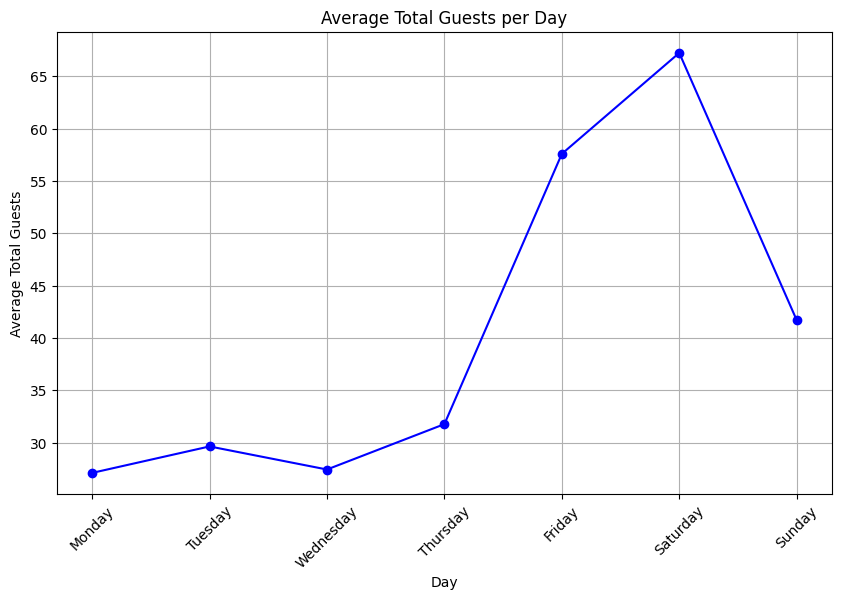

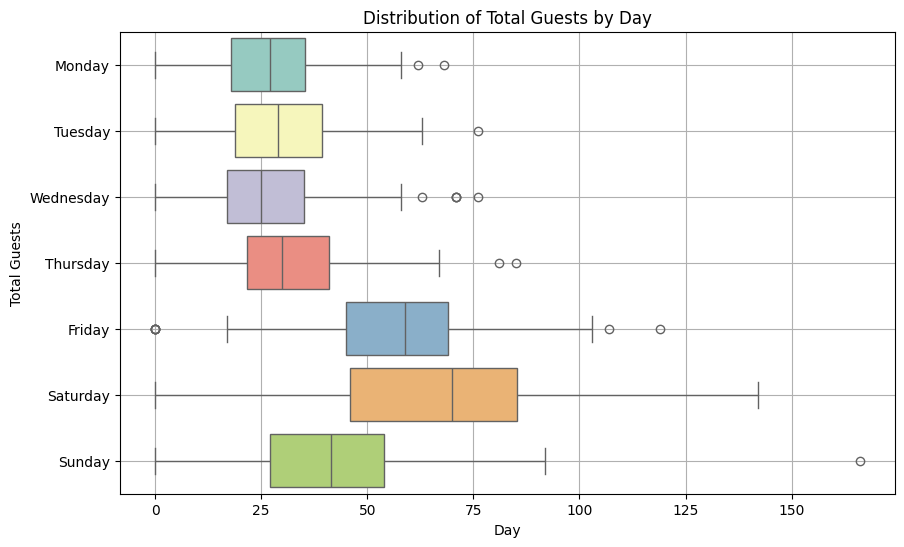

In [410]:
# Define the order of the days
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Convert 'Day' column to categorical data type with the defined order
dfTortillas['Day'] = pd.Categorical(dfTortillas['Day'], categories=day_order, ordered=True)

# Calculate the average total guests for each day
avg_total_guests_per_day = dfTortillas.groupby('Day', observed=False)['Total guests'].mean()

# Create a line plot
plt.figure(figsize=(10, 6))
avg_total_guests_per_day.plot(marker='o', color='b', linestyle='-')
plt.title('Average Total Guests per Day')
plt.xlabel('Day')
plt.ylabel('Average Total Guests')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Total guests', y='Day', data=dfTortillas, hue='Day', palette='Set3', dodge=False, legend=False)
plt.title('Distribution of Total Guests by Day')
plt.xlabel('Day')
plt.ylabel('Total Guests')
plt.grid(True)
plt.show()

You can observe that the day significantly influences the number of guests. The restaurant opens at 2 pm on weekends but at 5 pm on weekdays. Additionally, weekends (including Fridays) are particularly busy as they mark the beginning of the weekend.
It makes sense, as most people tend to dine out on their free evenings. Plus, with more colleagues at work during weekends, it's something we've come to anticipate.

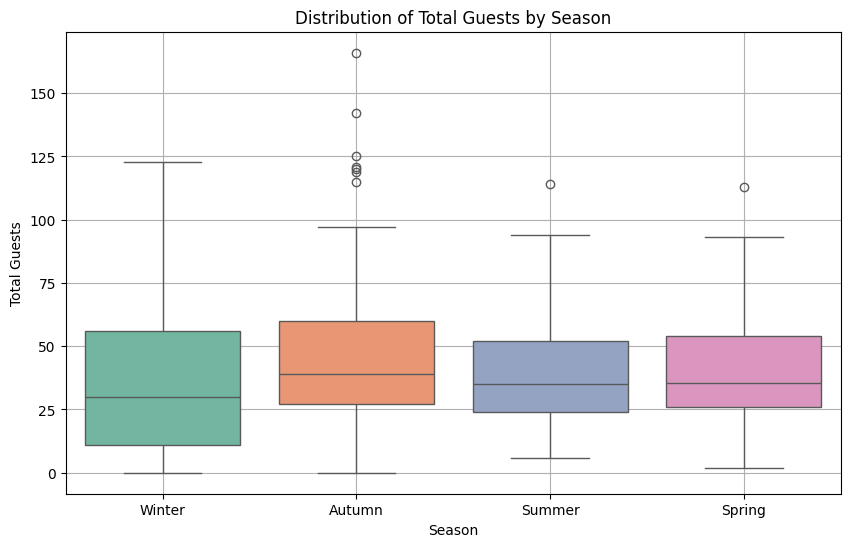

In [411]:
# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Season', y='Total guests', data=dfTortillas, hue='Season', palette='Set2', dodge=False, legend=False)
plt.title('Distribution of Total Guests by Season')
plt.xlabel('Season')
plt.ylabel('Total Guests')
plt.grid(True)
plt.show()

The restaurant offers three main seating areas: downstairs, upstairs, and the terrace. While the terrace is bustling on warm days, it has fewer spots compared to upstairs. During colder weather, we typically open upstairs, but fewer people venture outside on winter days. So initially, I expected the overall patronage to remain similar. However, what's interesting is the presence of numerous outliers during autumn. We'll look at it why.

In [412]:
# Print rows containing autumn and the outliers only
print(dfTortillas[(dfTortillas['Season'] == 'Autumn') & (dfTortillas['Total guests'] > 100)])

          Date       Day  Season  Total guests
120 2023-11-18  Saturday  Autumn         142.0
121 2023-11-17    Friday  Autumn         119.0
127 2023-11-11  Saturday  Autumn         120.0
141 2023-10-28  Saturday  Autumn         115.0
148 2023-10-21  Saturday  Autumn         125.0
161 2023-10-08    Sunday  Autumn         166.0
484 2022-11-19  Saturday  Autumn         121.0


All these days fall on weekends, which are typically the busiest on average. The top three days and the last one coincide with Glow, which I'll discuss later in relation to festival days. On October 8th, there's usually a surge in activity due to the marathon event. Perhaps on October 28th, there were two concerts scheduled, and on October 21st, there was a PSV match. I'll delve into these datasets later for further analysis.

To gain insight into how the number of guests is distributed per date, I'll create both a line and scatter plot visualizations. Given the variability in business from day to day, I anticipate that the data points will be scattered across the plot, reflecting the varying levels of busyness on different dates.

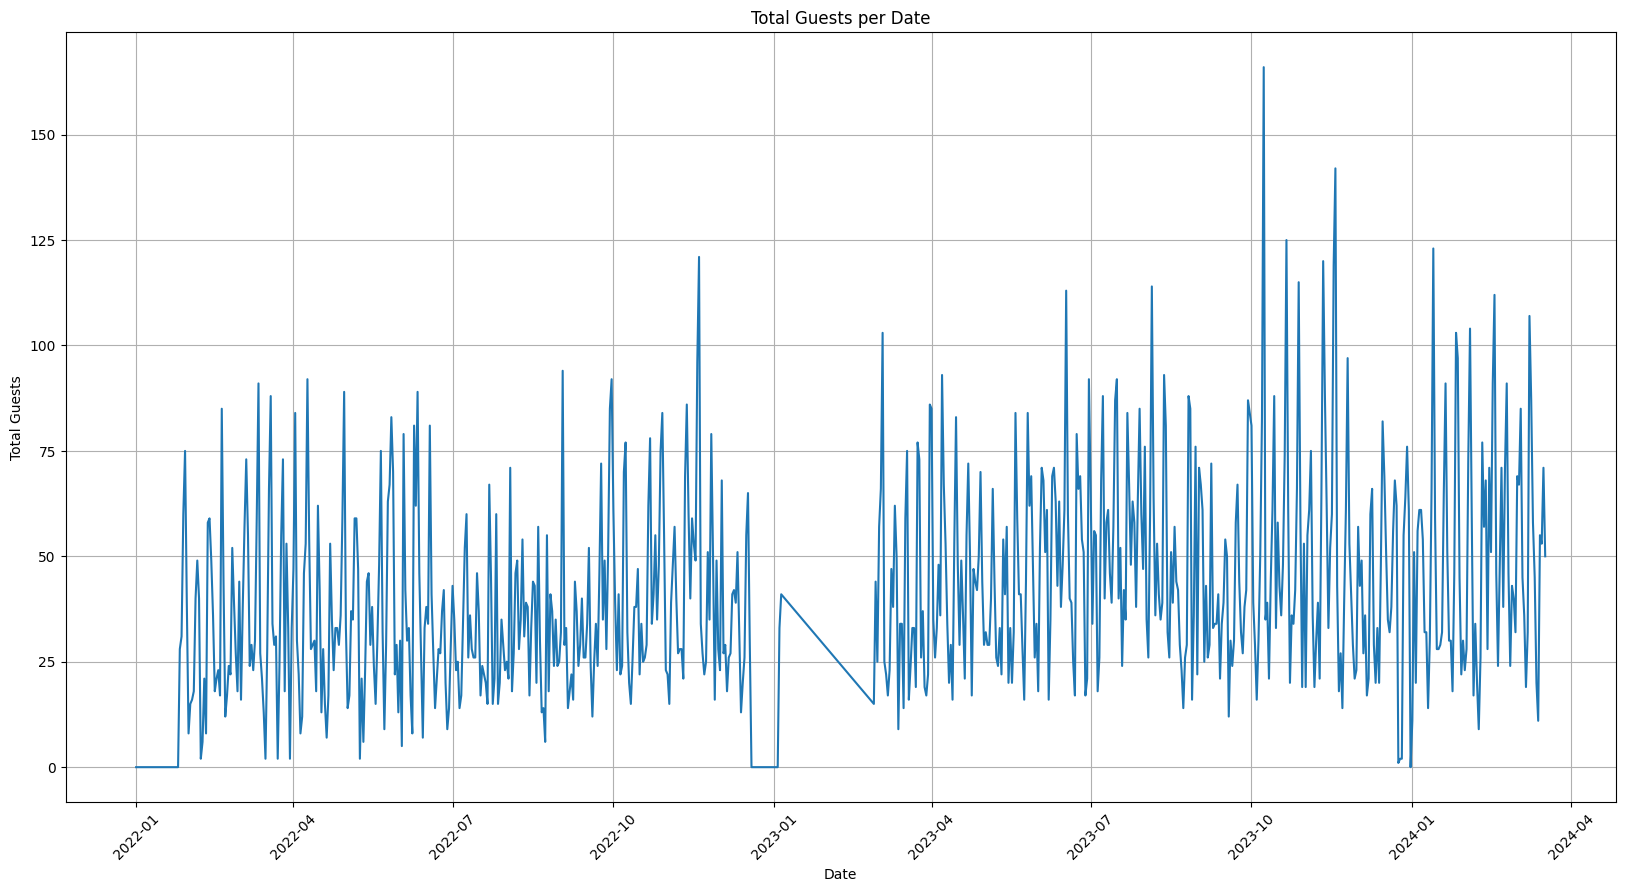

In [413]:
# Make a line plot foreach date of how many guest there were
plt.figure(figsize=(20, 10))
sns.lineplot(x='Date', y='Total guests', data=dfTortillas)
plt.title('Total Guests per Date')
plt.xlabel('Date')
plt.ylabel('Total Guests')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


The day of the week significantly impacts the flow of visitors, with Saturdays emerging as the busiest, closely followed by Fridays. Sundays also tend to be bustling, albeit to a lesser extent. Conversely, weekdays witness noticeably fewer patrons, marking a quieter period for business. The graph is going up and down all over the place and the scatter matrix as well. However if you look closely, you can see some patterns exists. THere seems to be a small clusterm right before 01/01/2023. I'll examine that.

In [414]:
# Print rows before 01/01/2023 and sorted by date
print(dfTortillas[dfTortillas['Date'] < '2023-01-01'].sort_values(by='Date', ascending=False))

          Date        Day  Season  Total guests
442 2022-12-31   Saturday  Winter           0.0
443 2022-12-30     Friday  Winter           0.0
444 2022-12-29   Thursday  Winter           0.0
445 2022-12-28  Wednesday  Winter           0.0
446 2022-12-27    Tuesday  Winter           0.0
..         ...        ...     ...           ...
802 2022-01-05  Wednesday  Winter           0.0
803 2022-01-04    Tuesday  Winter           0.0
804 2022-01-03     Monday  Winter           0.0
805 2022-01-02     Sunday  Winter           0.0
806 2022-01-01   Saturday  Winter           0.0

[365 rows x 4 columns]


On those days, the restaurant was closed, even though it wasn't its regular closing day. The boss had to manually input guests into the system, as the system wouldn't function otherwise. This situation raises the question of how to account for closing days in our prediction models, a topic I'll need to discuss further with my stakeholder to determine the best approach. NaN values means that the restaurant was closed. Filling it with 0 will mess up the machine learning, so not considering it in the model itself will be a valid solution for now.

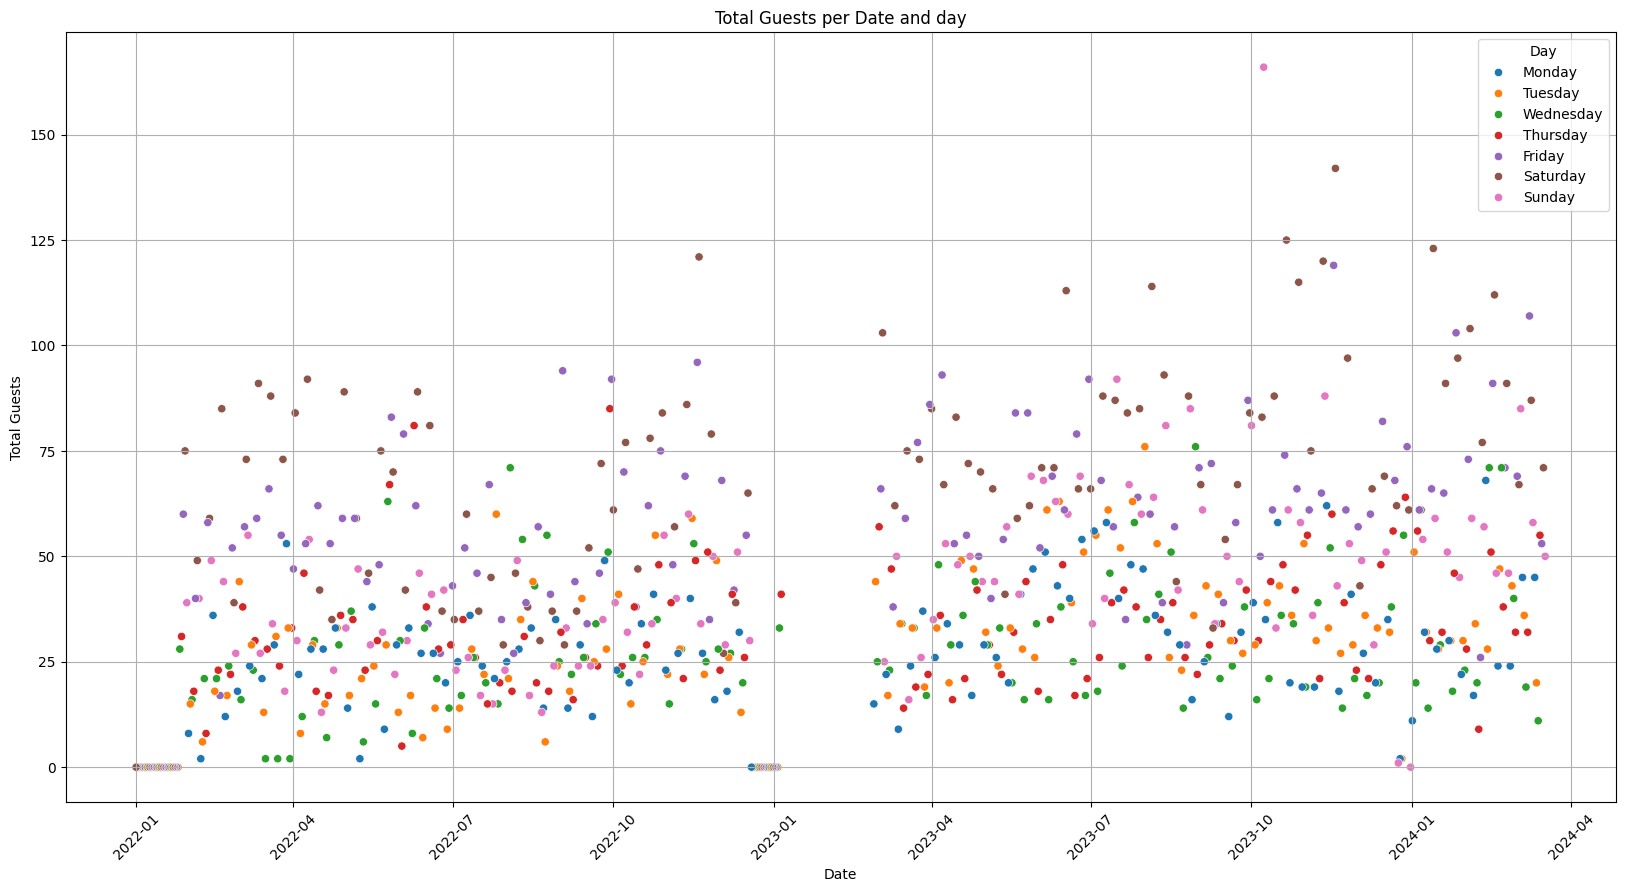

In [415]:
# Scatter plot
plt.figure(figsize=(20, 10))
sns.scatterplot(x='Date', y='Total guests', data=dfTortillas, hue='Day')
plt.title('Total Guests per Date and day')
plt.xlabel('Date')
plt.ylabel('Total Guests')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

After discussing with my stakeholder, we decided to remove two specific instances when the restaurant was closed. The first closure was due to COVID-19, and the second occurred during a holiday. Predictions during these periods are unnecessary as the restaurant's status was already determined. Furthermore, we observed only one instance when the restaurant had zero customers, which happened way back, during winter when there was heavy snowfall. The likelihood of this scenario recurring is extremely low.

In [416]:
# Remove rows where total guest is 0
dfTortillas = dfTortillas[dfTortillas['Total guests'] != 0]

#### Weather

Creating line plots to identify any discernible patterns. As with the guest data, I expect the weather data to exhibit variability, reflecting the fluctuations in weather conditions from day to day.

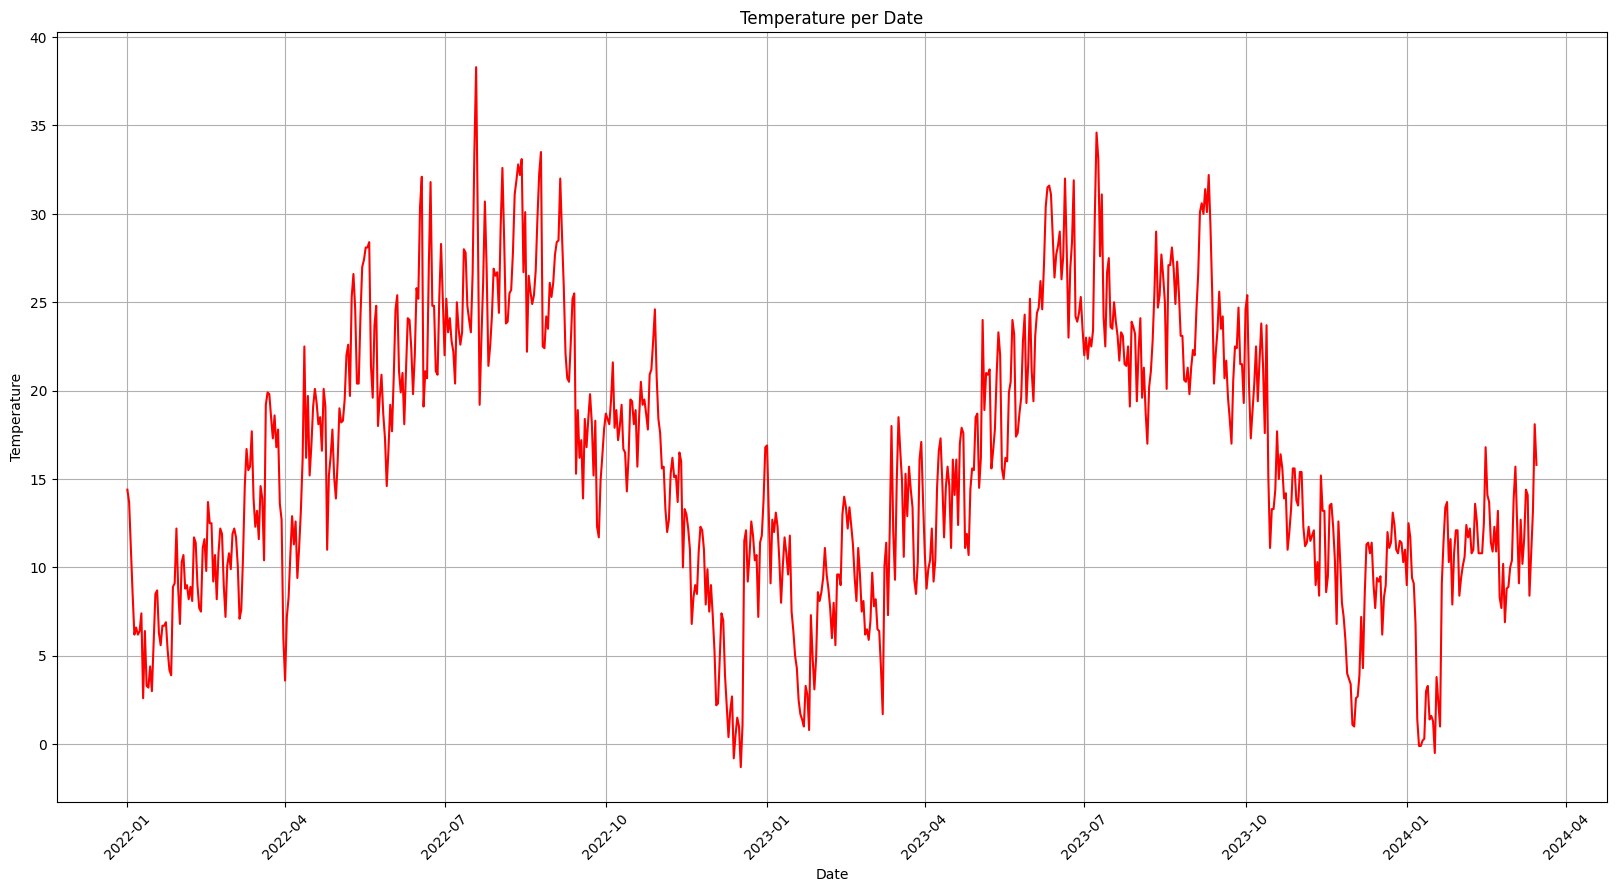

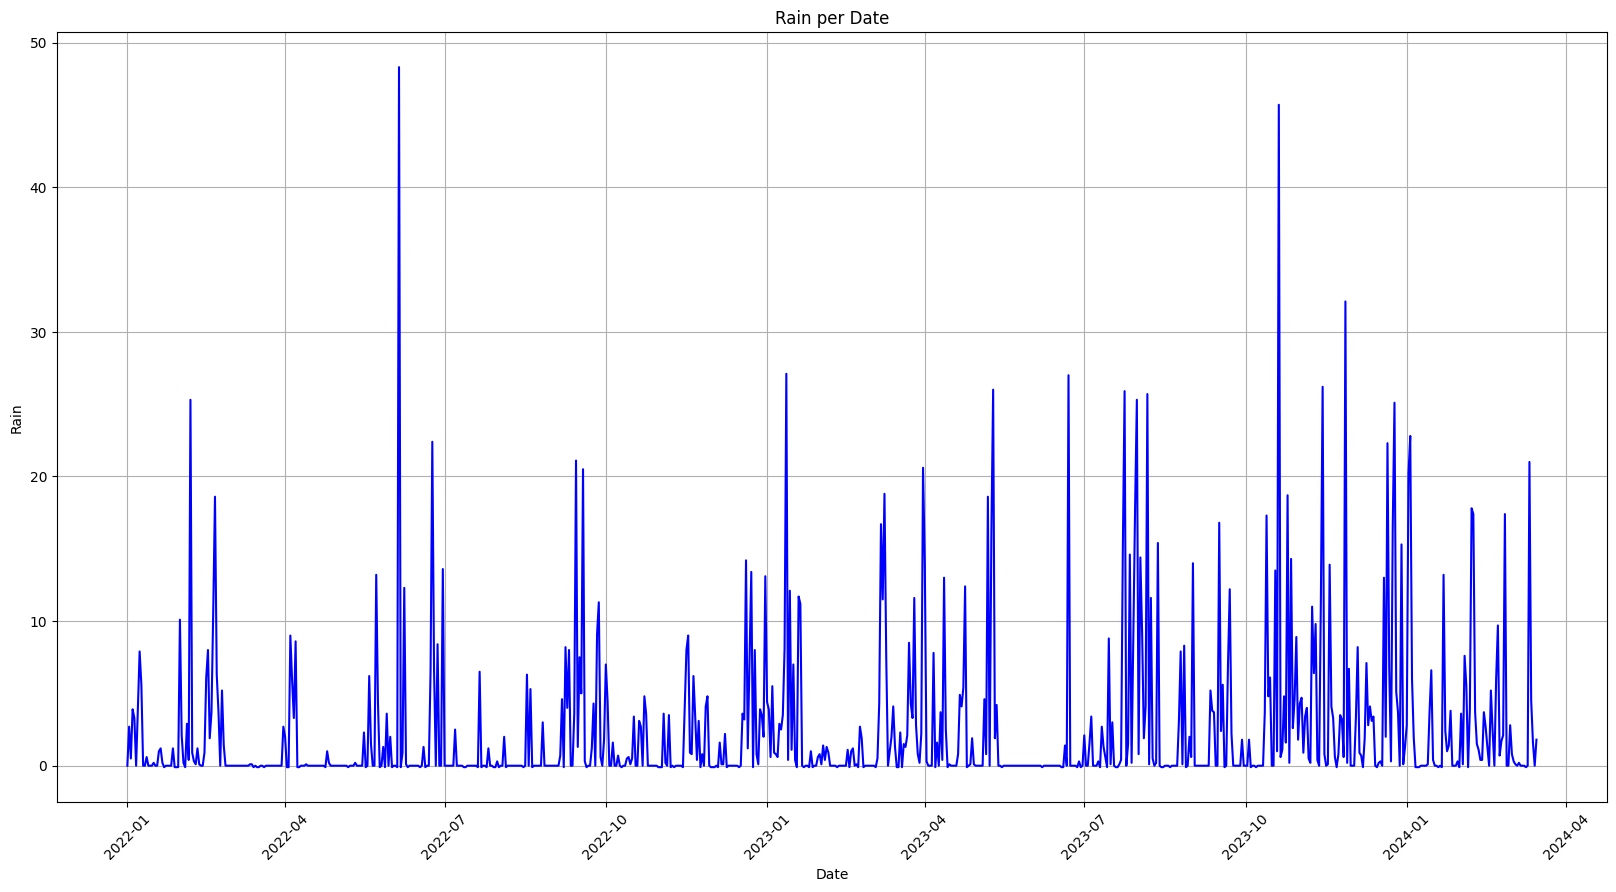

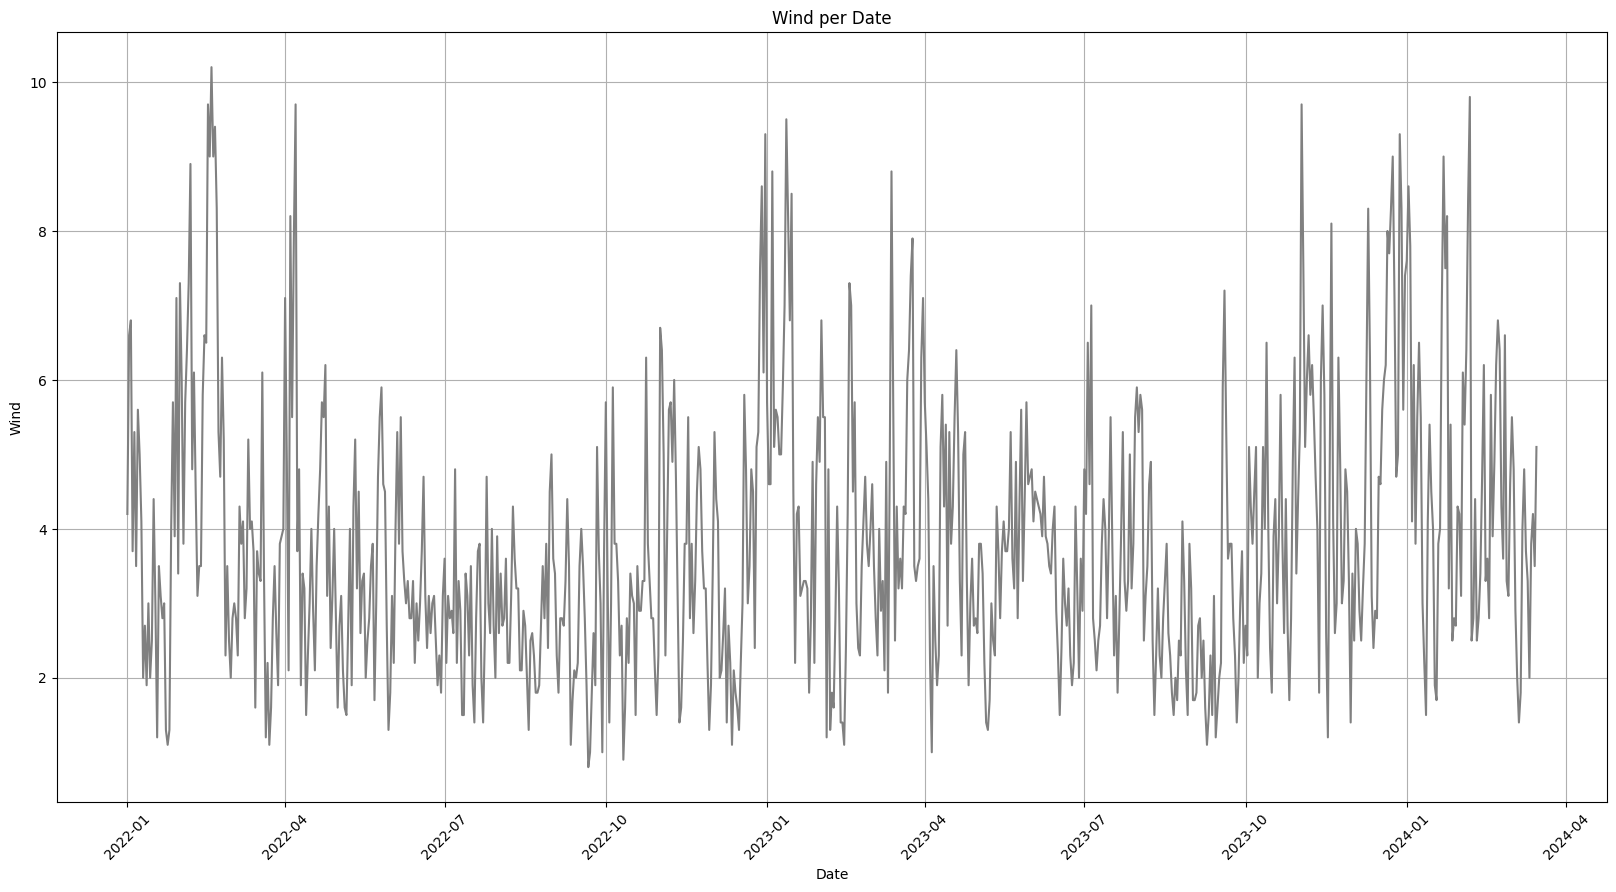

In [417]:
# Visualize temperature across the year per date
plt.figure(figsize=(20, 10))
sns.lineplot(x='Date', y='Temperature', data=dfWeather_selected, color='red')
plt.title('Temperature per Date')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Visualize rain across the year per date
plt.figure(figsize=(20, 10))
sns.lineplot(x='Date', y='Rain', data=dfWeather_selected, color='blue')
plt.title('Rain per Date')
plt.xlabel('Date')
plt.ylabel('Rain')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Visualize wind across the year per date
plt.figure(figsize=(20, 10))
sns.lineplot(x='Date', y='Wind', data=dfWeather_selected, color='gray')
plt.title('Wind per Date')
plt.xlabel('Date')
plt.ylabel('Wind')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


You can see there is a clear pattern in the temperature plot, indicating that temperatures are generally warmer during the summer months compared to the winter months. This pattern aligns with common expectations. It's possible that during hotter weather, people may have less appetite or be less inclined to eat, while colder temperatures might encourage people to stay indoors. To explore this further, you could calculate the average temperature and examine any correlation between deviations from this average and guest counts.

C:\Users\rowan\AppData\Local\Temp\ipykernel_15092\1354844049.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Date', y='Temperature difference', data=dfWeather_selected,


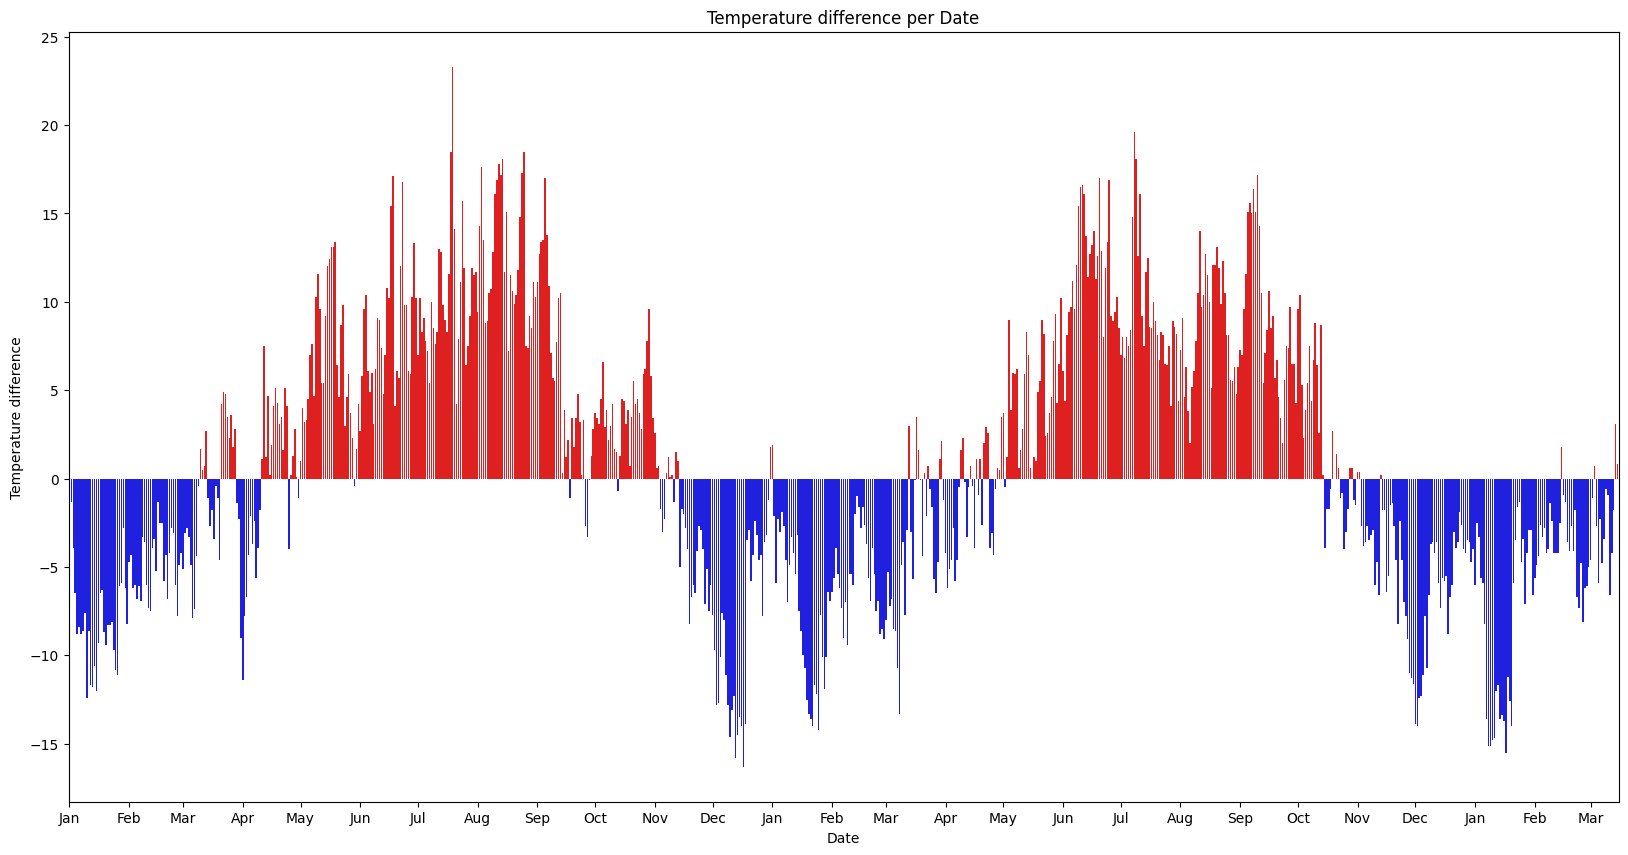

In [418]:
dfWeather_selected['Temperature difference'] = dfWeather_selected['Temperature'] - 15

# Make the visualization with green and red bars for variance
plt.figure(figsize=(20, 10))
ax = sns.barplot(x='Date', y='Temperature difference', data=dfWeather_selected, 
                 palette=[('blue' if x < 0 else 'red') for x in dfWeather_selected['Temperature difference']])

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.title('Temperature difference per Date')
plt.xlabel('Date')
plt.ylabel('Temperature difference')
plt.show()

In [419]:
# Apply absolute function to 'Temperature difference' column
dfWeather_selected['Temperature difference'] = dfWeather_selected['Temperature difference'].abs()

# Create a new dataframe for weather and tortillas combined
dfCombined = dfTortillas.merge(dfWeather_selected, how='inner', left_on='Date', right_on='Date')

dfCombined.head()

dfWeather_selected = dfWeather_selected.drop(columns=['Temperature difference'])

I'll merge the dataset with the Tortillas dataframe to see if there are any patterns in there.

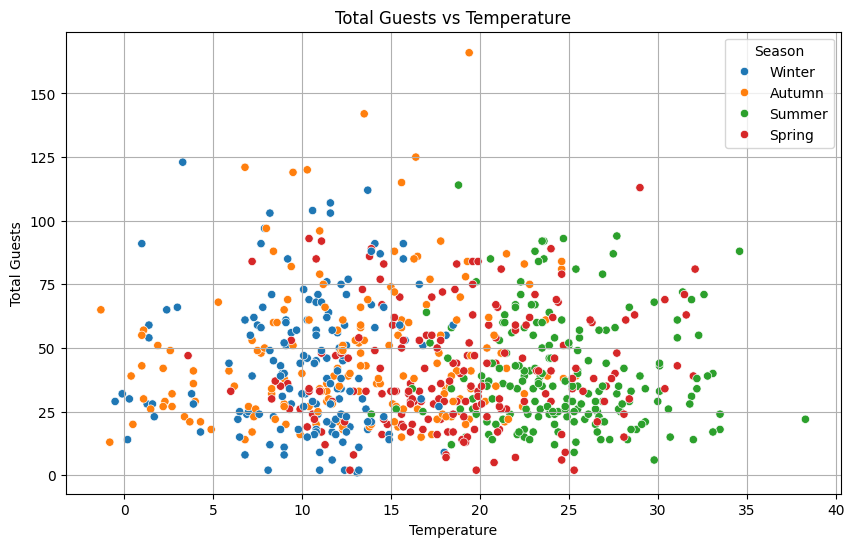

In [420]:
# Make scatter plot for temperature and total guests
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Temperature', y='Total guests', data=dfCombined, hue='Season')
plt.title('Total Guests vs Temperature')
plt.xlabel('Temperature')
plt.ylabel('Total Guests')
plt.grid(True)
plt.show()

There isn't a clear correlation or pattern between temperature and total guests. I'll attempt to analyze it using the average temperature and then comparing it with the temperature differences.

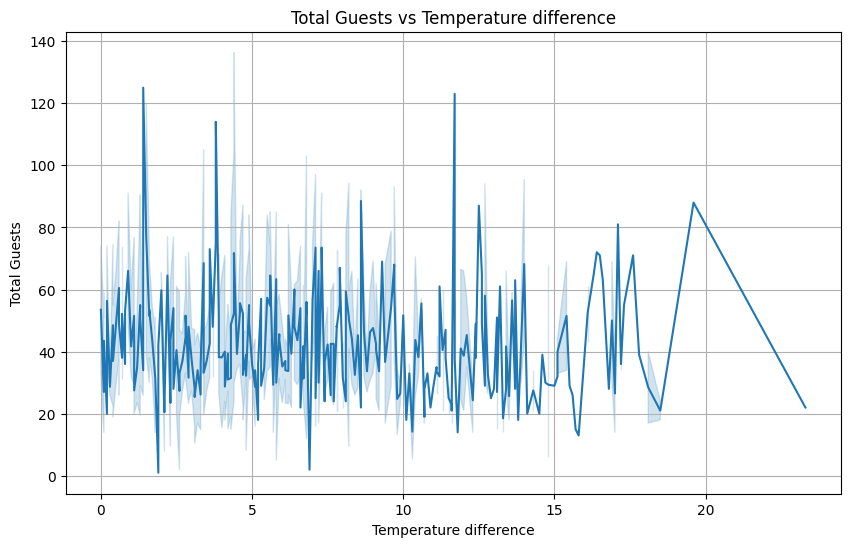

In [421]:
# Visualize difference temperature and total guest lineplot
plt.figure(figsize=(10, 6))
sns.lineplot(x='Temperature difference', y='Total guests', data=dfCombined)
plt.title('Total Guests vs Temperature difference')
plt.xlabel('Temperature difference')
plt.ylabel('Total Guests')
plt.grid(True)
plt.show()

# Drop temperature difference
dfCombined = dfCombined.drop(columns=['Temperature difference'])

Again, the same issue persists here. There doesn't appear to be any clear pattern. I experimented with calculating the temperature difference from 15 degrees (the average), but the data doesn't indicate a consistent trend. It seems uncertain whether the difference should lean towards being above or below that average.

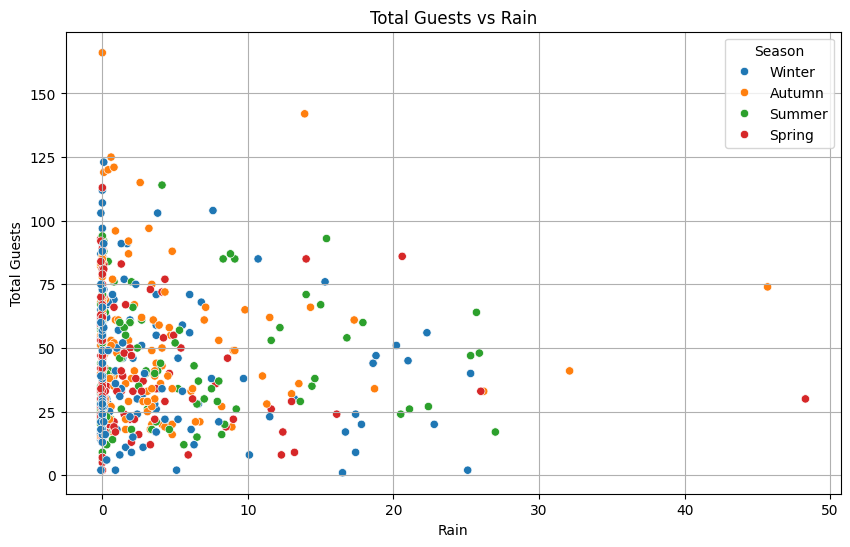

In [422]:
# Visualize total guests and rain
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Rain', y='Total guests', data=dfCombined, hue='Season')
plt.title('Total Guests vs Rain')
plt.xlabel('Rain')
plt.ylabel('Total Guests')
plt.grid(True)
plt.show()

You can see, there is a weak negative correlation between rain and total guests. That would make sense, because most of the people I know don't want to go outside while it's raining.

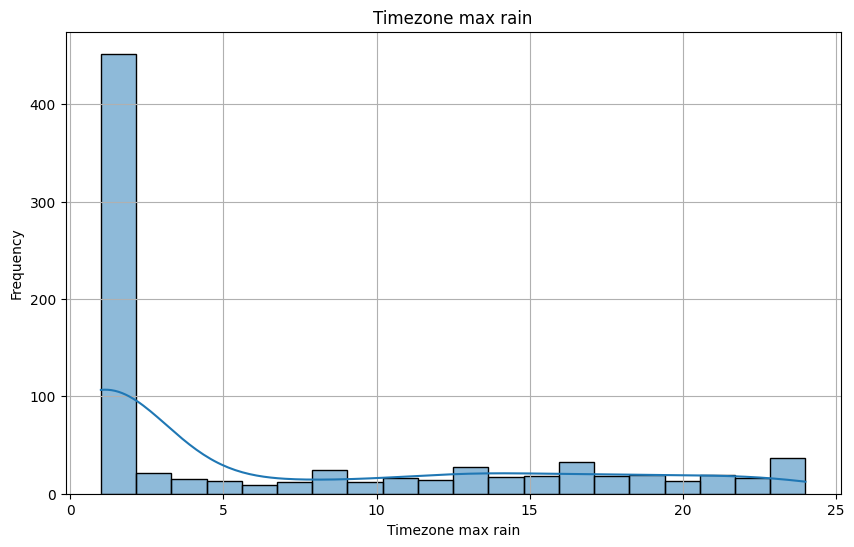

In [423]:
# Make histogram of timezone max rain
plt.figure(figsize=(10, 6))
sns.histplot(dfWeather_selected['Timezone max rain'], bins=20, kde=True)
plt.title('Timezone max rain')
plt.xlabel('Timezone max rain')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

The problem with this histogram is that when there is no rain, the timezone is automatically set to 1. So to fix that, make a copy of the dataframe and remove the rows containing 0 rain.

In [424]:
# Make copy  of weather df
dfWeather_selected_copy = dfWeather_selected.copy()

# Remove rows with Max rain =< 0
dfWeather_selected_copy = dfWeather_selected_copy[dfWeather_selected_copy['Max rain'] > 0]

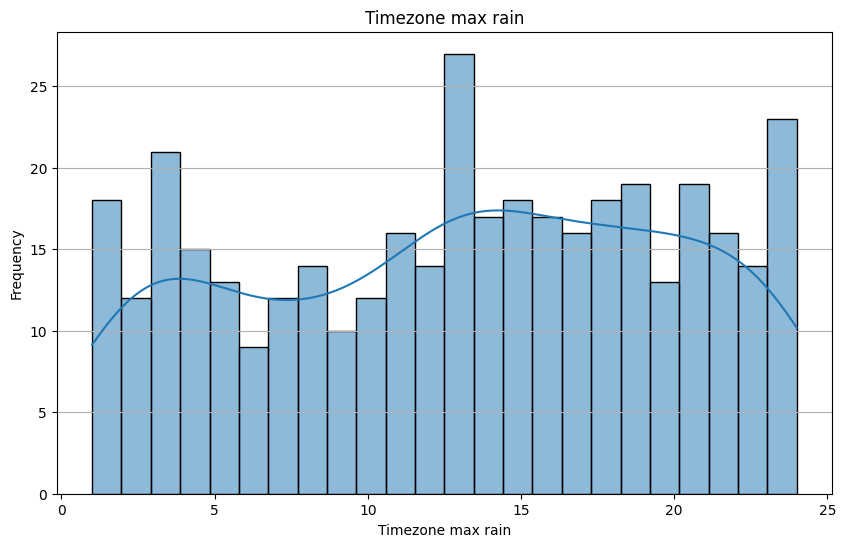

In [425]:
# Make histogram of timezone max rain
plt.figure(figsize=(10, 6))
sns.histplot(dfWeather_selected_copy['Timezone max rain'], bins=24, kde=True)
plt.title('Timezone max rain')
plt.xlabel('Timezone max rain')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()

There's a noticeable uptick in the curve from 12:00 to 21:00, which is particularly significant because the restaurant is open from 17:00 on weekdays and 14:00 on weekends. Additionally, it stands to reason that rain would impact people's behavior, with fewer opting to go out and eat if the peak is in the afternoon. Hence, I'm interested in dividing the data into three groups to discern any potential patterns.

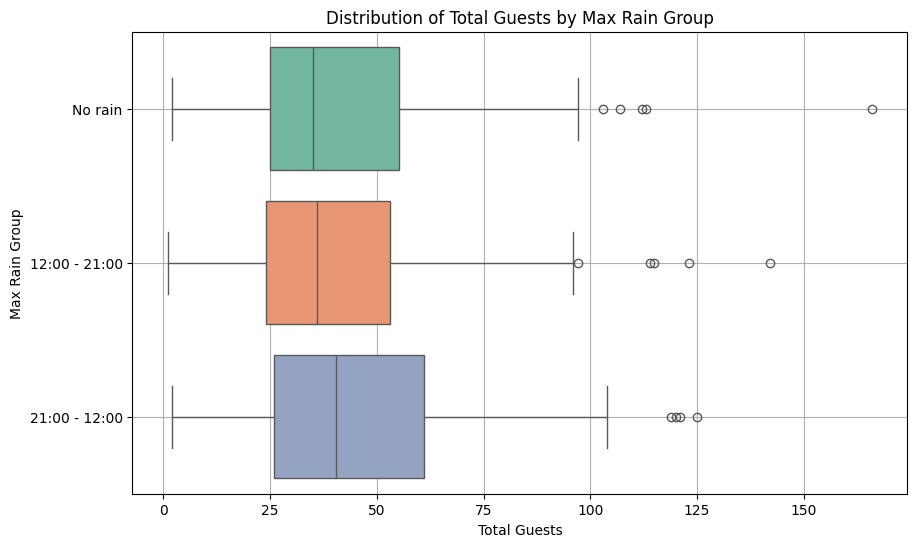

In [426]:
# Divide max rain into 3 groups, no rain, 12am-9pm, 9pm-12am
dfCombined.loc[dfCombined['Max rain'] <= 0, 'Max rain group'] = 'No rain'
dfCombined.loc[(dfCombined['Max rain'] > 0) & (dfCombined['Timezone max rain'] >= 12) & (dfCombined['Timezone max rain'] <= 21), 'Max rain group'] = '12:00 - 21:00'
dfCombined.loc[(dfCombined['Max rain'] > 0) & ((dfCombined['Timezone max rain'] > 21) | (dfCombined['Timezone max rain'] < 12)), 'Max rain group'] = '21:00 - 12:00'

# Sort them
dfCombined['Max rain group'] = pd.Categorical(dfCombined['Max rain group'], categories=['No rain', '12:00 - 21:00', '21:00 - 12:00'], ordered=True)

# Visualize Max rain group and total guests
plt.figure(figsize=(10, 6))
sns.boxplot(x='Total guests', y='Max rain group', data=dfCombined, hue='Max rain group', palette='Set2', dodge=False, legend=False)
plt.title('Distribution of Total Guests by Max Rain Group')
plt.xlabel('Total Guests')
plt.ylabel('Max Rain Group')
plt.grid(True)
plt.show()

My initial hypothesis was that if the peak of rainfall falls between 12:00 and 21:00, there would be fewer customers (as fewer people would be out in town, coinciding with the restaurant's opening hours), while the "no rain" condition would see the highest footfall, and the period from 21:00 to 12:00 would lie somewhere in between. Although the average for 12:00 to 21:00 is slightly lower, it's nearly the same across the board, suggesting that this initial assumption may not hold true.

In [427]:
# Print the amount of rows foreach category
print(dfCombined['Max rain group'].value_counts())

Max rain group
No rain          408
21:00 - 12:00    191
12:00 - 21:00    164
Name: count, dtype: int64


There seems to be little correlation between weather conditions and the number of guests. However, I'm unable to investigate other correlation with the weather and other aspects of the restaurant (for example the type of products being sold). Therefore, for predicting the number of customers, weather may not be a reliable feature for the machine learning aspect.

In [428]:
dfWeather_selected.head()

,Date,Temperature,Rain,Duration rain,Max rain,Timezone max rain,Wind,Timezone max wind
0,2022-01-01,14.4,0.0,0.0,0.0,1,4.2,1
1,2022-01-02,13.7,2.7,4.8,0.6,19,6.6,21
2,2022-01-03,11.1,0.5,0.4,0.4,7,6.8,1
3,2022-01-04,8.5,3.9,3.9,1.7,15,3.7,12
4,2022-01-05,6.2,3.3,2.8,2.0,19,5.3,11


#### PSV

In [429]:
dfPsv.head()

,Date,Time,Type,Cancelled
0,2022-05-11,20:00,Eredivisie,0
1,2022-05-01,14:30,Eredivisie,0
2,2022-04-17,18:00,KNVB Beker,0
3,2022-04-14,18:45,Europa Conference League,0
4,2022-04-10,14:30,Eredivisie,0


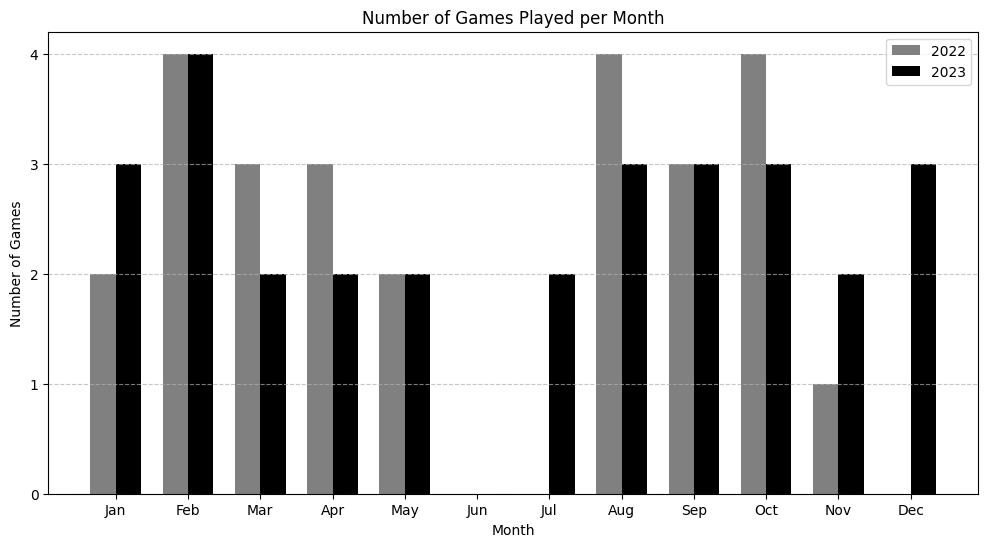

In [430]:
# Convert 'Date' column to datetime format if it's not already
dfPsv['Date'] = pd.to_datetime(dfPsv['Date'])

# Extract year and month from the 'Date' column
dfPsv['Year'] = dfPsv['Date'].dt.year
dfPsv['Month'] = dfPsv['Date'].dt.month

# Select only the year 2022 and 2023
dfPsv = dfPsv[dfPsv['Year'].isin([2022, 2023])]

# Group by year and month and count the number of games
games_per_year_month = dfPsv.groupby(['Year', 'Month']).size().unstack(fill_value=0)

# Fill missing months with zeros
months = range(1, 13)
games_per_year_month = games_per_year_month.reindex(columns=months, fill_value=0)

# Define the width of each bar
bar_width = 0.35

# Define the x-coordinates for each group of bars
x = np.arange(len(games_per_year_month.columns))

# Plot the bar plot
plt.figure(figsize=(12, 6))

# Plot bars for each month for 2022 (gray color)
plt.bar(x - bar_width/2, games_per_year_month.loc[2022], width=bar_width, color='gray', label='2022')

# Plot bars for each month for 2023 (black color)
plt.bar(x + bar_width/2, games_per_year_month.loc[2023], width=bar_width, color='black', label='2023')

plt.title('Number of Games Played per Month')
plt.xlabel('Month')
plt.ylabel('Number of Games')
plt.xticks(ticks=x, labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.yticks(np.arange(0, games_per_year_month.max().max() + 1, step=1))
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


## Data Preparation

#### Tortillas (side exercise)

In version 1.2 there are some missing values of the amount of guests for the Tortillas dataframe.

In [431]:
dfTortillas.isna().sum()

Date             0
Day              0
Season           0
Total guests    52
dtype: int64

It's my oversight. We use a system at work that displays daily guest counts. I had to snap pictures of it with my phone to input the data into an Excel sheet. However, when I reviewed the pictures at home, I noticed that some of the values were blurry and not clearly visible on my screen. Consequently, I couldn't accurately enter them into my Excel sheet. This is considered Missing at Random (MAR), an incidental occurrence during the image capture process, rather than being directly related to the guest counts.

In [432]:
# Calculate the percentage of missing values for the total guests
missing_total_guests = dfTortillas['Total guests'].isna().sum()
total_rows = dfTortillas.shape[0]
percentage_missing_total_guests = (missing_total_guests / total_rows) * 100
print(f'The percentage of missing values for the total guests is {percentage_missing_total_guests:.2f}%')

The percentage of missing values for the total guests is 6.80%



With nearly 20% of the data missing, that's quite a substantial portion. Let's create a histogram to visualize how these missing values are distributed throughout the dataset.

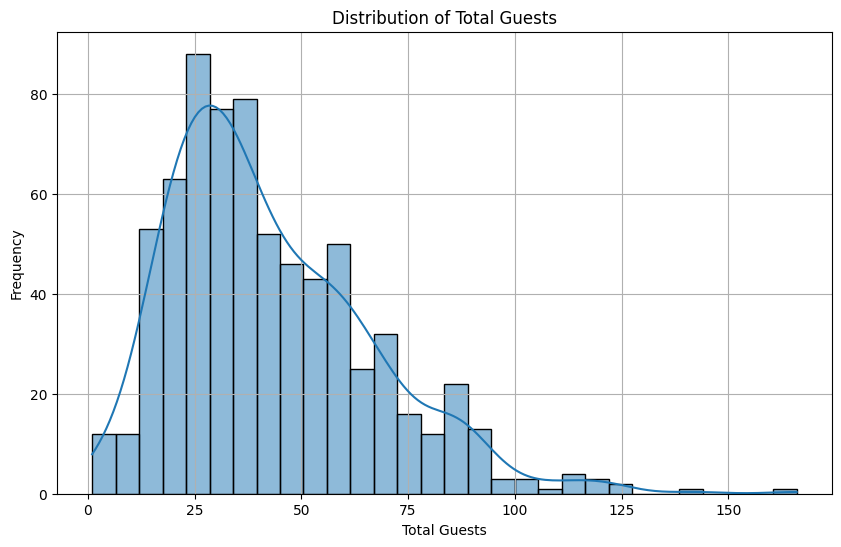

In [433]:
# make histogram
plt.figure(figsize=(10, 6))
sns.histplot(dfTortillas['Total guests'], bins=30, kde=True)
plt.title('Distribution of Total Guests')
plt.xlabel('Total Guests')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


Filling in the missing values according to the day type is crucial. As seen in the initial data, weekends have more complete entries compared to weekdays. Therefore, we need to prioritize filling in the missing values based on whether it's a weekend or a weekday to ensure the dataset's integrity.

The steps:
* Fill values by day, prioritizing this feature for accuracy.
* Maintain the shape of the histogram; filling in missing values with averages would distort the histogram.

In [434]:
# Group the DataFrame by 'Day'
grouped = dfTortillas.groupby('Day')

# Define a function to fill missing values by interpolation for each group
def fill_missing(group):
    # Interpolate missing values
    group['Total guests'] = group['Total guests'].interpolate()
    # Round interpolated values to the nearest integer
    group['Total guests'] = group['Total guests'].apply(lambda x: np.round(x))
    return group

df_filled = grouped.apply(fill_missing)
df_filled = df_filled.sort_values(by='Date')
df_filled = df_filled.reset_index(drop=True)

print(df_filled)

          Date        Day  Season  Total guests
0   2022-01-26  Wednesday  Winter          28.0
1   2022-01-27   Thursday  Winter          31.0
2   2022-01-28     Friday  Winter          60.0
3   2022-01-29   Saturday  Winter          75.0
4   2022-01-30     Sunday  Winter          39.0
..         ...        ...     ...           ...
760 2024-03-13  Wednesday  Winter          11.0
761 2024-03-14   Thursday  Winter          55.0
762 2024-03-15     Friday  Winter          53.0
763 2024-03-16   Saturday  Winter          71.0
764 2024-03-17     Sunday  Winter          50.0

[765 rows x 4 columns]


C:\Users\rowan\AppData\Local\Temp\ipykernel_15092\1494416561.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = dfTortillas.groupby('Day')
C:\Users\rowan\AppData\Local\Temp\ipykernel_15092\1494416561.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_filled = grouped.apply(fill_missing)


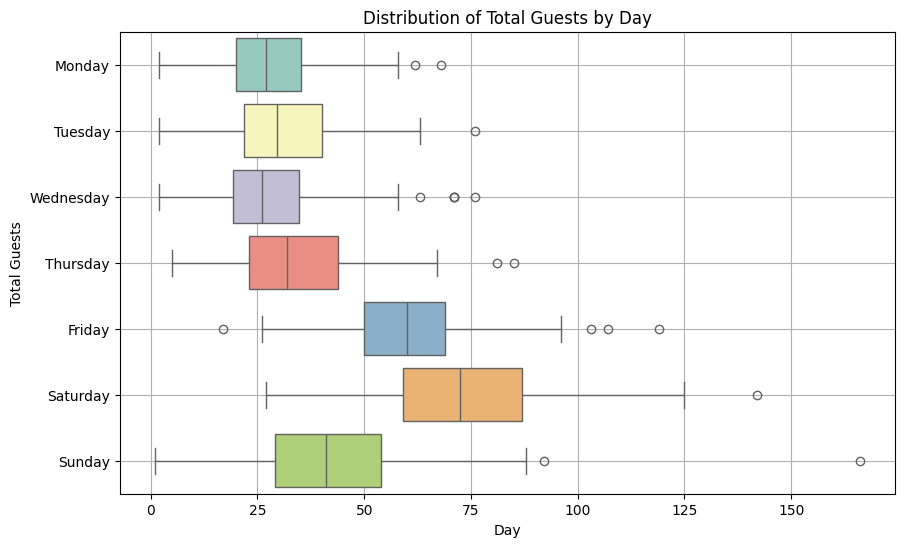

In [435]:
# Visualize total guests per day
plt.figure(figsize=(10, 6))
sns.boxplot(x='Total guests', y='Day', data=df_filled, hue='Day', palette='Set3', dodge=False, legend=False)
plt.title('Distribution of Total Guests by Day')
plt.xlabel('Day')
plt.ylabel('Total Guests')
plt.grid(True)
plt.show()


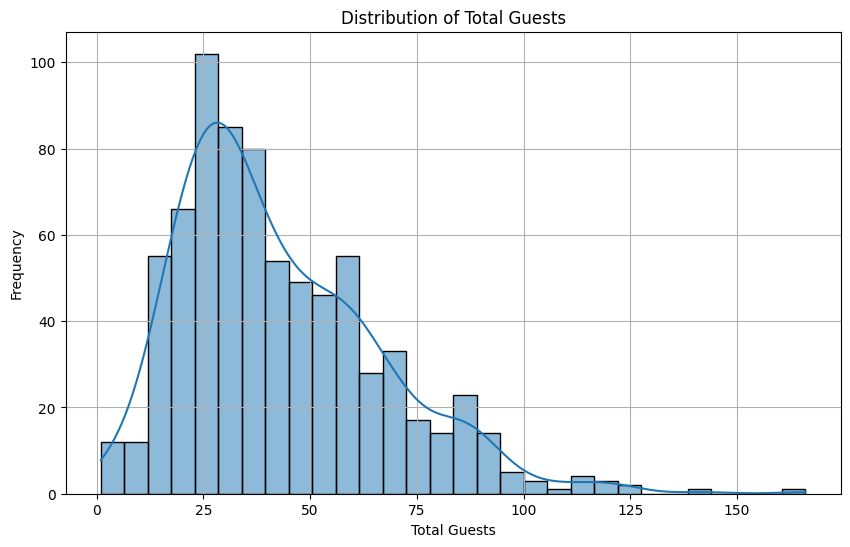

In [436]:
# Create histogram Tortillas
plt.figure(figsize=(10, 6))
sns.histplot(df_filled['Total guests'], bins=30, kde=True)
plt.title('Distribution of Total Guests')
plt.xlabel('Total Guests')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [437]:
df_filled.isna().sum()

Date            0
Day             0
Season          0
Total guests    0
dtype: int64

In [438]:
dfTortillas = df_filled

As you can see, filling the values didn't affect the histogram and boxplot, now let's check the timeline.

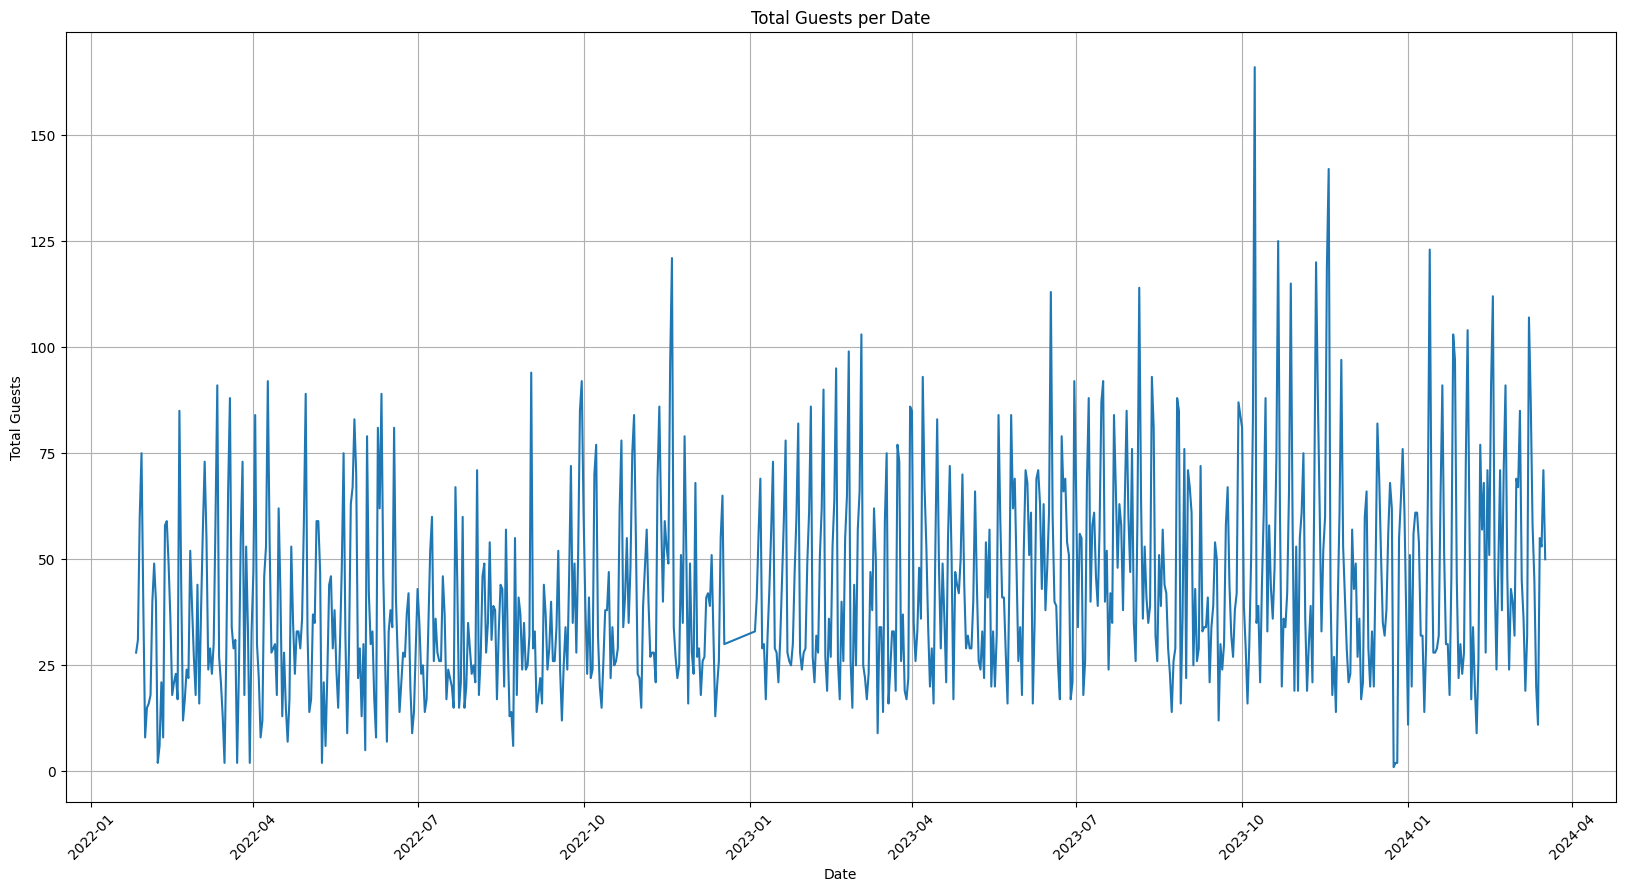

In [439]:
# Make a line plot foreach date of how many guest there were
plt.figure(figsize=(20, 10))
sns.lineplot(x='Date', y='Total guests', data=df_filled)
plt.title('Total Guests per Date')
plt.xlabel('Date')
plt.ylabel('Total Guests')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Interpolating generates clear patterns that wouldn't necessarily occur in real-life scenarios. However, it can still be utilized for the machine learning aspect as it provides reasonably good data.

#### Final df

To understand the functionality of the data, we initially need to consolidate it by merging relevant datasets. Once combined, we can explore potential correlations within the data. To facilitate this exploration, I've introduced a new column indicating the count of PSV matches and Effenaar concerts held on each respective day. This approach allows us to analyze any potential relationships or patterns between the occurrence of these events and other variables within the dataset.

In [440]:
# Convert 'Date' column to datetime format for other DataFrames
dfTortillas['Date'] = pd.to_datetime(dfTortillas['Date'])
dfPsv['Date'] = pd.to_datetime(dfPsv['Date'])
dfEffenaar['Date'] = pd.to_datetime(dfEffenaar['Date'])

# Count the number of events for each date in dfPsv and dfEffenaar
dfPsv_count = dfPsv.groupby('Date').size().reset_index(name='PSV_Count')
dfEffenaar_count = dfEffenaar.groupby('Date').size().reset_index(name='Effenaar_Count')

# Merge the counts with dfTortillas
combined_data = pd.merge(dfTortillas, dfPsv_count, on='Date', how='left')
df = pd.merge(combined_data, dfEffenaar_count, on='Date', how='left')

# Merge dfWeather_selected with finalDf
df = pd.merge(df, dfWeather_selected, on='Date', how='left')

# Merge df with holidays
df = pd.merge(df, dfHolidays, on='Date', how='left')

# Merge df with feastdays
df = pd.merge(df, dfFeastDays, on='Date', how='left')

df.head()

,Date,Day,Season,Total guests,PSV_Count,Effenaar_Count,Temperature,Rain,Duration rain,Max rain,Timezone max rain,Wind,Timezone max wind,Holiday,Feastday
0,2022-01-26,Wednesday,Winter,28.0,NaN,NaN,3.9,0.0,0.0,0.0,1.0,4.0,23.0,NaN,NaN
1,2022-01-27,Thursday,Winter,31.0,NaN,NaN,8.9,1.2,3.6,0.4,9.0,5.7,7.0,NaN,NaN
2,2022-01-28,Friday,Winter,60.0,NaN,NaN,9.1,-0.1,0.0,-0.1,1.0,3.9,23.0,NaN,NaN
3,2022-01-29,Saturday,Winter,75.0,NaN,NaN,12.2,-0.1,0.0,-0.1,1.0,7.1,16.0,NaN,NaN
4,2022-01-30,Sunday,Winter,39.0,NaN,NaN,8.8,-0.1,0.0,-0.1,1.0,3.4,24.0,NaN,NaN


It contains Null values, so we have to deal with that first.

In [441]:
# Fill NaN with 0 for PSV_Count
df['PSV_Count'] = df['PSV_Count'].fillna(0)

# Fill NaN with 0 for Effenaar_Count
df['Effenaar_Count'] = df['Effenaar_Count'].fillna(0)

# Fill missing FeastDays and Holidays with a placeholder value
df['Feastday'] = df['Feastday'].fillna('None')
df['Holiday'] = df['Holiday'].fillna('None')

# Remove rows containg Null values for temperature
df = df.dropna(subset=['Temperature'])

# Print NaN values
print(df.isna().sum())

Date                 0
Day                  0
Season               0
Total guests         0
PSV_Count            0
Effenaar_Count       0
Temperature          0
Rain                 0
Duration rain        0
Max rain             0
Timezone max rain    0
Wind                 0
Timezone max wind    0
Holiday              0
Feastday             0
dtype: int64


# Phase 3 Predictions

## 🛠️ Preprocessing

### 💡 Feature selection

To predict the number of restaurant guests per day, it's helpful to create a correlation matrix. This matrix helps us see which features are improving the model.

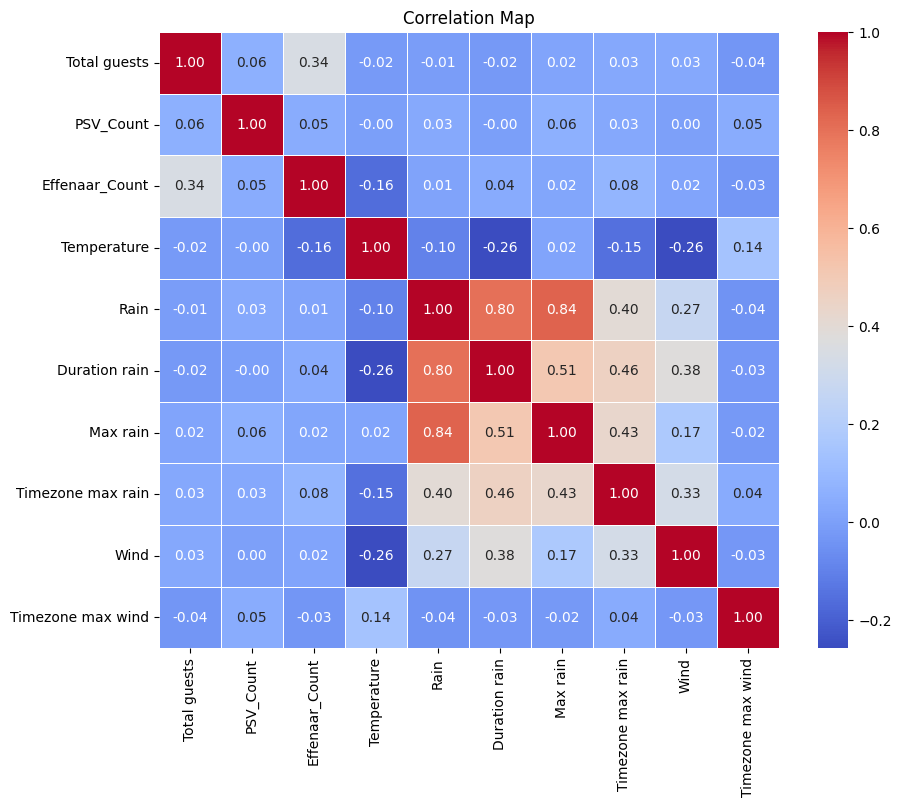

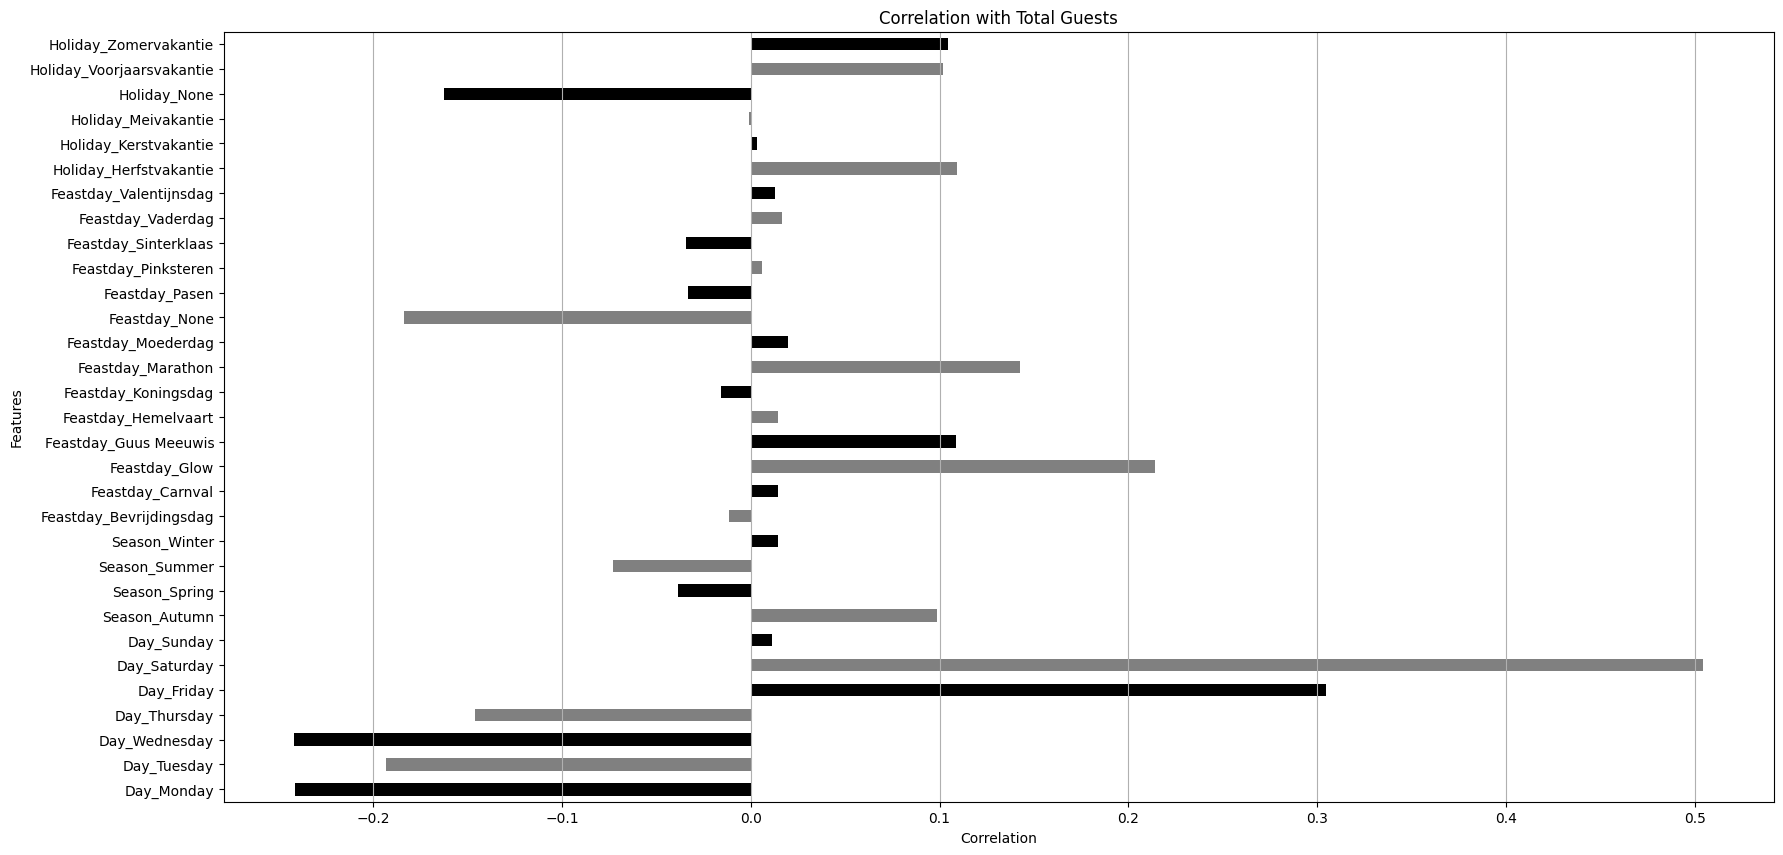

In [442]:
numeric_df = df.drop(columns=['Date', 'Day', 'Season', 'Feastday', 'Holiday'])

# Create the correlation matrix
correlation_matrix = numeric_df.corr()

# Generate a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Map')
plt.show()

# Perform one-hot encoding for categorical variables
df_encoded = pd.get_dummies(df, columns=['Day', 'Season', 'Feastday', 'Holiday'])

# Drop columns
df_encoded = df_encoded.drop(columns=['Date', 'PSV_Count', 'Effenaar_Count', 'Temperature', 'Rain', 'Duration rain', 'Max rain', 'Timezone max rain', 'Wind', 'Timezone max wind', 'Temperature'])

# Create the correlation matrix
correlation_matrix_encoded = df_encoded.corr()

# Select correlations related to 'Total guests'
total_guests_correlation_encoded = correlation_matrix_encoded['Total guests'].drop('Total guests')

# Plot the correlation values related to 'Total guests'
plt.figure(figsize=(20, 10))
colors = ['black', 'gray']  # Define alternating colors
total_guests_correlation_encoded.plot(kind='barh', color=colors * (len(total_guests_correlation_encoded) // 2 + 1))
plt.title('Correlation with Total Guests')
plt.ylabel('Features')
plt.xlabel('Correlation')
plt.grid(axis='x')
plt.show()


So now that we've expanded the dataset with more features, we can pick them all to check how the model will perform.

In [443]:
# Define features and target variables
features = ['Day', 'PSV_Count', 'Effenaar_Count', 'Temperature', 'Rain', 'Duration rain', 'Max rain', 'Timezone max rain', 'Wind', 'Timezone max wind', 'Holiday', 'Feastday']
target = "Total guests"

X = df[features]
y = df[target]

### 🆔 Encoding

The features `Day`, `Holiday`, `Feastday` are currently categorical. To include those you need to encode it, because it are string types and the machine only reads numbers. This is not so easily done, it doesn't have order or ranking foreach category, so ranking/labelling isn't smart to do. One-hot encoding makes a column foreach different category and sets it a 0 or 1 (true or false), which will create a lot more columns, however the features are the same. 

In [444]:
# Perform one-hot encoding for categorical variables
X_encoded = pd.get_dummies(X, columns=['Day', 'Holiday', 'Feastday'])

print(X_encoded.columns)

X_encoded.head()

Index(['PSV_Count', 'Effenaar_Count', 'Temperature', 'Rain', 'Duration rain',
       'Max rain', 'Timezone max rain', 'Wind', 'Timezone max wind',
       'Day_Monday', 'Day_Tuesday', 'Day_Wednesday', 'Day_Thursday',
       'Day_Friday', 'Day_Saturday', 'Day_Sunday', 'Holiday_Herfstvakantie',
       'Holiday_Kerstvakantie', 'Holiday_Meivakantie', 'Holiday_None',
       'Holiday_Voorjaarsvakantie', 'Holiday_Zomervakantie',
       'Feastday_Bevrijdingsdag', 'Feastday_Carnval', 'Feastday_Glow',
       'Feastday_Guus Meeuwis', 'Feastday_Hemelvaart', 'Feastday_Koningsdag',
       'Feastday_Marathon', 'Feastday_Moederdag', 'Feastday_None',
       'Feastday_Pasen', 'Feastday_Pinksteren', 'Feastday_Sinterklaas',
       'Feastday_Vaderdag', 'Feastday_Valentijnsdag'],
      dtype='object')


,PSV_Count,Effenaar_Count,Temperature,Rain,Duration rain,Max rain,Timezone max rain,Wind,Timezone max wind,Day_Monday,...,Feastday_Hemelvaart,Feastday_Koningsdag,Feastday_Marathon,Feastday_Moederdag,Feastday_None,Feastday_Pasen,Feastday_Pinksteren,Feastday_Sinterklaas,Feastday_Vaderdag,Feastday_Valentijnsdag
0,0.0,0.0,3.9,0.0,0.0,0.0,1.0,4.0,23.0,False,...,False,False,False,False,True,False,False,False,False,False
1,0.0,0.0,8.9,1.2,3.6,0.4,9.0,5.7,7.0,False,...,False,False,False,False,True,False,False,False,False,False
2,0.0,0.0,9.1,-0.1,0.0,-0.1,1.0,3.9,23.0,False,...,False,False,False,False,True,False,False,False,False,False
3,0.0,0.0,12.2,-0.1,0.0,-0.1,1.0,7.1,16.0,False,...,False,False,False,False,True,False,False,False,False,False
4,0.0,0.0,8.8,-0.1,0.0,-0.1,1.0,3.4,24.0,False,...,False,False,False,False,True,False,False,False,False,False


### 🪓 Splitting into train/test

We keep 20% of the data aside for testing. The model learns from the other 80%. After training, we check how well the model predicts the outcomes for the 20% we set aside. This is mathematically the best distribution overall. If its predictions match well with this portion, the model is doing a good job.

In [445]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=.2, random_state=1)
print("There are in total", len(X), "observations, of which", len(X_train), "are now in the train set, and", len(X_test), "in the test set.")

There are in total 764 observations, of which 611 are now in the train set, and 153 in the test set.


### ⚖️ Scaling

Scaling is generally needed for nearest neighbors algorithm. It's important because they compare distances between data points to see how similar they are. Since they look at it in an absolute way, different scales can affect the model.

In [446]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## 🧬 Modelling

In [447]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
score = knn.score(X_test, y_test)
print("R²:", score)

R²: 0.4405857323894984


The model scores a 0.44, which is okay so far.

## 🔬 Evaluation

In [451]:
# Make predictions on the test set
y_pred = knn.predict(X_test)

# Create a DataFrame to compare truth, prediction, and error absolute
overview = pd.DataFrame({'Truth': y_test, 'Prediction': y_pred, 'Error': abs(y_test - y_pred)})
overview = overview.reset_index(drop=True)
overview.head()

,Truth,Prediction,Error
0,57.0,36.2,20.8
1,28.0,27.6,0.4
2,38.0,35.2,2.8
3,35.0,45.0,10.0
4,75.0,64.4,10.6


This evaluation wouldn't provide that much information. It's possible to create regression plot to make it visually more appealing.

<Axes: xlabel='Predicted amount', ylabel='True amount'>

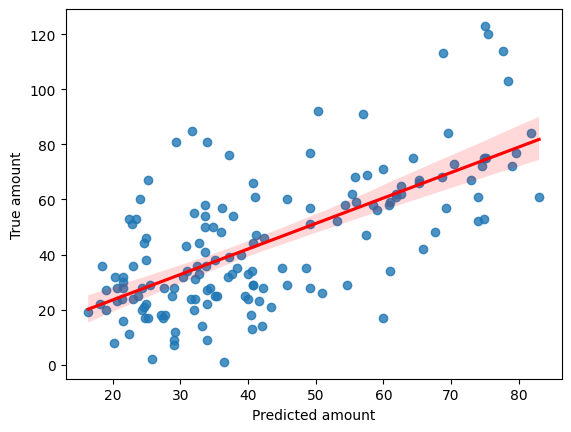

In [449]:
# plot the regrossor line
plot = sns.regplot(y=y_test.values.flatten(), x=y_pred.flatten(), line_kws={"color": "r"})
plot.set_xlabel("Predicted amount")
plot.set_ylabel("True amount")
plot.set_title("")
plot

The dots are fairly not in the red area. There are some outliers in reality and the model never predicts the amount under 15 and above 90. The relation between the features and the target variable is not linear, so it's better to come up with something better instead.

In [450]:
import math
from sklearn.metrics import max_error
from sklearn.metrics import mean_squared_error

me = max_error(y_test, y_pred)
me = math.ceil(me)
print("Max Error:", me)

mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)
rmse = math.ceil(rmse)
print("Root Mean Squared Error:", rmse)

Max Error: 54
Root Mean Squared Error: 19


### 🗳️ Conclusion.

The score of the model is 0.44, which is pretty inaccurate. Considering that this is a basic model using the nearest neighbors algorithm and all available features, the performance is acceptable. However, there is definitely room for improvement. Overall, this initial model provides a reasonable starting point, but looking at other techniques and models are important.